In [36]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams.update({'font.size': 20})

In [37]:
E_FermiM_tvdw = -1.22545
E_FermiAA_tvdw = 3.6383
E_FermiAB_tvdw = 5.625
E_FermiAC_tvdw = 8.3189

E_FermiM_vdw = -1.34085
E_FermiAA_vdw = 3.48565
E_FermiAB_vdw = 6.37335
E_FermiAC_vdw = 8.3637

tau = 1*10**(-14)

In [38]:
# data= pd.read_csv('data_$Al_{2}S_{2}$ non-vdW.dat', sep='\s+|\s+')
# data= pd.read_csv('/home/kmdn/research/jurnal/WSTe/data_$Al_{2}S_{2}$ non-vdW.dat', sep='\s+|\s+')
dataM_tvdw = pd.read_csv('/home/kmdn/research/jurnal/Al2O2/mono/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
datAA_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAA/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
dataAB_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAB/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
dataAC_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAC/tanpa_vdw/interpolation.trace', sep='\s+|\s+')

dataM_vdw = pd.read_csv('/home/kmdn/research/jurnal/Al2O2/mono/vdw/interpolation.trace', sep='\s+|\s+')
datAA_vdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAA/vdw/interpolation.trace', sep='\s+|\s+')
dataAB_vdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAB/vdw/interpolation.trace', sep='\s+|\s+')
dataAC_vdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAC/vdw/interpolation.trace', sep='\s+|\s+')

/tmp/ipykernel_37329/832184882.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  dataM_tvdw = pd.read_csv('/home/kmdn/research/jurnal/Al2O2/mono/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
/tmp/ipykernel_37329/832184882.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  datAA_tvdw= pd.read_csv('/home/kmdn/research/jurnal/Al2O2/bulk/bulkAA/tanpa_vdw/interpolation.trace', sep='\s+|\s+')
/tmp/ipykernel_37329/832184882.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex)

In [39]:
dataM_tvdw.head()

,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-0.662963,100,11.0483,41.9288,-0.000016,5.365740e+19,3.330750e-09,1.396010e+14,0.398335,3.277150e-12
1,-0.662963,200,11.0415,43.9544,-0.000008,5.614550e+19,5.563200e-09,2.786230e+14,0.741485,3.435460e-12
2,-0.662963,300,11.0378,43.8823,0.000005,5.663150e+19,5.841700e-09,4.100520e+14,0.903352,3.429830e-12
3,-0.662963,400,11.0385,42.4990,0.000015,5.677460e+19,5.641560e-09,5.537040e+14,1.062610,3.321710e-12
4,-0.662963,500,11.0426,40.8513,0.000020,5.701750e+19,5.285520e-09,7.062310e+14,1.254120,3.192930e-12


In [40]:
datAA_tvdw.columns
dataAB_tvdw.columns
dataAC_tvdw.columns

Index(['Ef[Ry]', 'T[K]', 'N[e/uc]', 'DOS(ef)[1/(Ha*uc)]', 'S[V/K]',
       'sigma/tau0[1/(ohm*m*s)]', 'RH[m**3/C]', 'kappae/tau0[W/(m*K*s)]',
       'cv[J/(mol*K)]', 'chi[m**3/mol]'],
      dtype='object')

In [41]:
datM_tvdw300 = dataM_tvdw[dataM_tvdw['T[K]']==300].reset_index(drop=True)
datM_tvdw600 = dataM_tvdw[dataM_tvdw['T[K]']==600].reset_index(drop=True)
datM_tvdw900 = dataM_tvdw[dataM_tvdw['T[K]']==900].reset_index(drop=True)
datM_tvdw1200 = dataM_tvdw[dataM_tvdw['T[K]']==1200].reset_index(drop=True)

datAA_tvdw300 = datAA_tvdw[datAA_tvdw['T[K]']==300].reset_index(drop=True)
datAA_tvdw600 = datAA_tvdw[datAA_tvdw['T[K]']==600].reset_index(drop=True)
datAA_tvdw900 = datAA_tvdw[datAA_tvdw['T[K]']==900].reset_index(drop=True)
datAA_tvdw1200 = datAA_tvdw[datAA_tvdw['T[K]']==1200].reset_index(drop=True)

datAB_tvdw300 = dataAB_tvdw[dataAB_tvdw['T[K]']==300].reset_index(drop=True)
datAB_tvdw600 = dataAB_tvdw[dataAB_tvdw['T[K]']==600].reset_index(drop=True)
datAB_tvdw900 = dataAB_tvdw[dataAB_tvdw['T[K]']==900].reset_index(drop=True)
datAB_tvdw1200 = dataAB_tvdw[dataAB_tvdw['T[K]']==1200].reset_index(drop=True)

datAC_tvdw300 = dataAC_tvdw[dataAC_tvdw['T[K]']==300].reset_index(drop=True)
datAC_tvdw600 = dataAC_tvdw[dataAC_tvdw['T[K]']==600].reset_index(drop=True)
datAC_tvdw900 = dataAC_tvdw[dataAC_tvdw['T[K]']==900].reset_index(drop=True)
datAC_tvdw1200 = dataAC_tvdw[dataAC_tvdw['T[K]']==1200].reset_index(drop=True)

In [42]:
datM_vdw300 = dataM_vdw[dataM_vdw['T[K]']==300].reset_index(drop=True)
datM_vdw600 = dataM_vdw[dataM_vdw['T[K]']==600].reset_index(drop=True)
datM_vdw900 = dataM_vdw[dataM_vdw['T[K]']==900].reset_index(drop=True)
datM_vdw1200 = dataM_vdw[dataM_vdw['T[K]']==1200].reset_index(drop=True)

datAA_vdw300 = datAA_vdw[datAA_vdw['T[K]']==300].reset_index(drop=True)
datAA_vdw600 = datAA_vdw[datAA_vdw['T[K]']==600].reset_index(drop=True)
datAA_vdw900 = datAA_vdw[datAA_vdw['T[K]']==900].reset_index(drop=True)
datAA_vdw1200 = datAA_vdw[datAA_vdw['T[K]']==1200].reset_index(drop=True)

datAB_vdw300 = dataAB_vdw[dataAB_vdw['T[K]']==300].reset_index(drop=True)
datAB_vdw600 = dataAB_vdw[dataAB_vdw['T[K]']==600].reset_index(drop=True)
datAB_vdw900 = dataAB_vdw[dataAB_vdw['T[K]']==900].reset_index(drop=True)
datAB_vdw1200 = dataAB_vdw[dataAB_vdw['T[K]']==1200].reset_index(drop=True)

datAC_vdw300 = dataAC_vdw[dataAC_vdw['T[K]']==300].reset_index(drop=True)
datAC_vdw600 = dataAC_vdw[dataAC_vdw['T[K]']==600].reset_index(drop=True)
datAC_vdw900 = dataAC_vdw[dataAC_vdw['T[K]']==900].reset_index(drop=True)
datAC_vdw1200 = dataAC_vdw[dataAC_vdw['T[K]']==1200].reset_index(drop=True)

In [43]:
datAA_tvdw900.head()

,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-0.206012,900,22.0533,64.3198,0.000003,1.353470e+20,1.685940e-11,3.315130e+15,2.29992,6.694020e-12
1,-0.204322,900,21.9456,63.8787,0.000004,1.333790e+20,2.577300e-12,3.347820e+15,2.16136,6.648110e-12
2,-0.202633,900,21.8391,63.1408,0.000005,1.318670e+20,-1.025850e-11,3.379240e+15,2.04535,6.571320e-12
3,-0.200943,900,21.7348,61.8927,0.000007,1.308730e+20,-2.145750e-11,3.408290e+15,1.96519,6.441410e-12
4,-0.199254,900,21.6337,60.0028,0.000010,1.304420e+20,-3.186030e-11,3.434200e+15,1.92704,6.244730e-12


In [44]:
# data koefisien seebeck
X3_S_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_S_M_tvdw=datM_tvdw300.iloc[:,4]
X6_S_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_S_M_tvdw=datM_tvdw600.iloc[:,4]
X9_S_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_S_M_tvdw=datM_tvdw900.iloc[:,4]
X12_S_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_S_M_tvdw=datM_tvdw1200.iloc[:,4]

X3_S_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_S_AA_tvdw=datAA_tvdw300.iloc[:,4]
X6_S_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_S_AA_tvdw=datAA_tvdw600.iloc[:,4]
X9_S_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_S_AA_tvdw=datAA_tvdw900.iloc[:,4]
X12_S_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_S_AA_tvdw=datAA_tvdw1200.iloc[:,4]

X3_S_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_S_AB_tvdw=datAB_tvdw300.iloc[:,4]
X6_S_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_S_AB_tvdw=datAB_tvdw600.iloc[:,4]
X9_S_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_S_AB_tvdw=datAB_tvdw900.iloc[:,4]
X12_S_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_S_AB_tvdw=datAB_tvdw1200.iloc[:,4]

X3_S_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_S_AC_tvdw=datAC_tvdw300.iloc[:,4]
X6_S_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_S_AC_tvdw=datAC_tvdw600.iloc[:,4]
X9_S_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_S_AC_tvdw=datAC_tvdw900.iloc[:,4]
X12_S_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_S_AC_tvdw=datAC_tvdw1200.iloc[:,4]

X3_S_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_S_M_vdw=datM_vdw300.iloc[:,4]
X6_S_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_S_M_vdw=datM_vdw600.iloc[:,4]
X9_S_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_S_M_vdw=datM_vdw900.iloc[:,4]
X12_S_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_S_M_vdw=datM_vdw1200.iloc[:,4]

X3_S_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_S_AA_vdw=datAA_vdw300.iloc[:,4]
X6_S_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_S_AA_vdw=datAA_vdw600.iloc[:,4]
X9_S_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_S_AA_vdw=datAA_vdw900.iloc[:,4]
X12_S_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_S_AA_vdw=datAA_vdw1200.iloc[:,4]

X3_S_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_S_AB_vdw=datAB_vdw300.iloc[:,4]
X6_S_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_S_AB_vdw=datAB_vdw600.iloc[:,4]
X9_S_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_S_AB_vdw=datAB_vdw900.iloc[:,4]
X12_S_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_S_AB_vdw=datAB_vdw1200.iloc[:,4]

X3_S_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_S_AC_vdw=datAC_vdw300.iloc[:,4]
X6_S_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_S_AC_vdw=datAC_vdw600.iloc[:,4]
X9_S_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_S_AC_vdw=datAC_vdw900.iloc[:,4]
X12_S_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_S_AC_vdw=datAC_vdw1200.iloc[:,4]

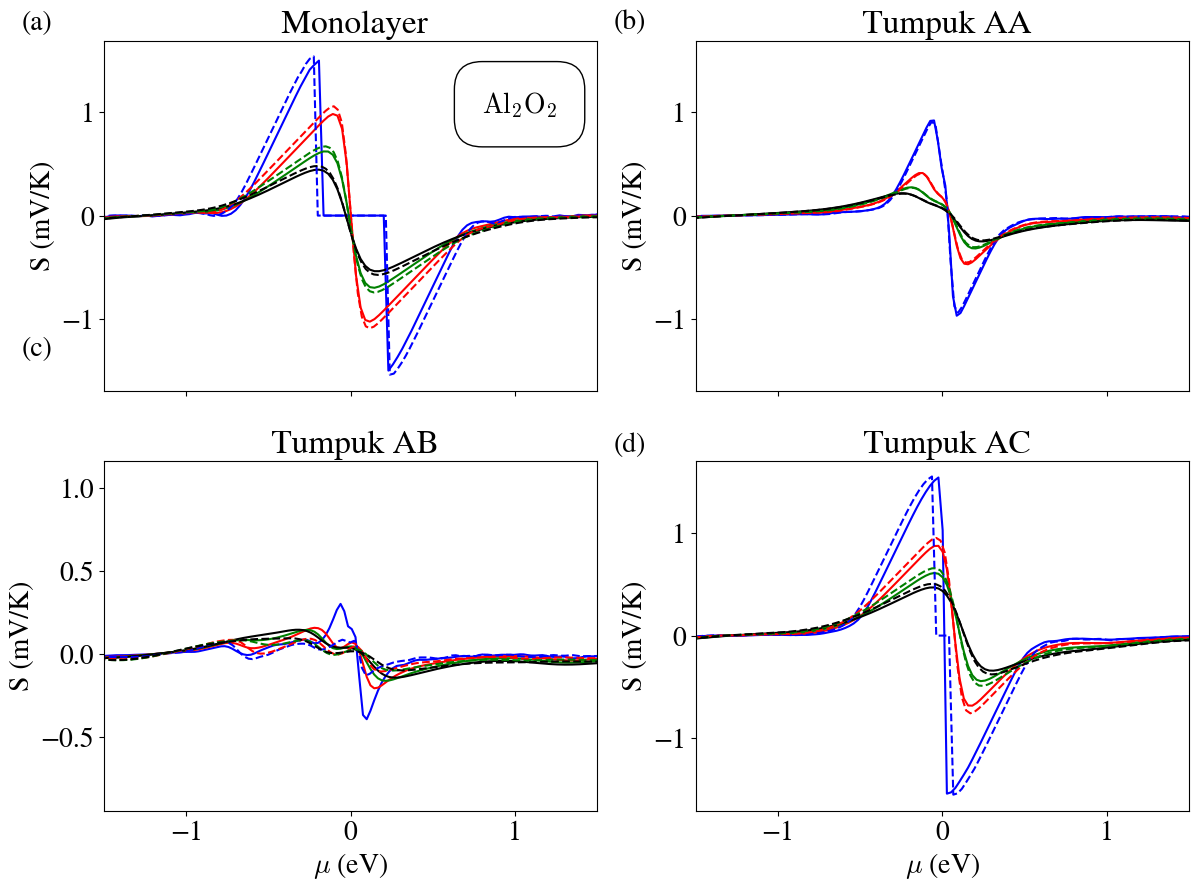

In [45]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_S_M_tvdw,Y3_S_M_tvdw*1000, color ='blue', label='300 K')
axs[0][0].plot(X6_S_M_tvdw,Y6_S_M_tvdw*1000, color ='red', label='600 K')
axs[0][0].plot(X9_S_M_tvdw,Y9_S_M_tvdw*1000, color='green', label ='900 K')
axs[0][0].plot(X12_S_M_tvdw,Y12_S_M_tvdw*1000, color='black', label ='1200 K')
axs[0][0].plot(X3_S_M_vdw,Y3_S_M_vdw*1000, color ='blue', linestyle='dashed')
axs[0][0].plot(X6_S_M_vdw,Y6_S_M_vdw*1000, color ='red', linestyle='dashed')
axs[0][0].plot(X9_S_M_vdw,Y9_S_M_vdw*1000, color='green', linestyle='dashed')
axs[0][0].plot(X12_S_M_vdw,Y12_S_M_vdw*1000, color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'S (mV/K)' )
axs[0][0].set_xlim([-1.5, 1.5])
# axs[0][0].legend()
axs[0][0].text(0.8,1,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
# axs[0][0].legend(loc='lower left')

axs[0][1].plot(X3_S_AA_tvdw,Y3_S_AA_tvdw*1000, color ='blue', label='300 K')
axs[0][1].plot(X6_S_AA_tvdw,Y6_S_AA_tvdw*1000, color ='red', label='600 K')
axs[0][1].plot(X9_S_AA_tvdw,Y9_S_AA_tvdw*1000, color='green', label ='900 K')
axs[0][1].plot(X12_S_AA_tvdw,Y12_S_AA_tvdw*1000, color='black', label ='1200 K')
axs[0][1].plot(X3_S_AA_vdw,Y3_S_AA_vdw*1000, color ='blue', linestyle='dashed')
axs[0][1].plot(X6_S_AA_vdw,Y6_S_AA_vdw*1000, color ='red', linestyle='dashed')
axs[0][1].plot(X9_S_AA_vdw,Y9_S_AA_vdw*1000, color='green', linestyle='dashed')
axs[0][1].plot(X12_S_AA_vdw,Y12_S_AA_vdw*1000, color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'S (mV/K)' )
axs[0][1].set_xlim([-1.5, 1.5])
# axs[0][1].legend()

axs[1][0].plot(X3_S_AB_tvdw,Y3_S_AB_tvdw*1000, color ='blue', label='300 K')
axs[1][0].plot(X6_S_AB_tvdw,Y6_S_AB_tvdw*1000, color ='red', label='600 K')
axs[1][0].plot(X9_S_AB_tvdw,Y9_S_AB_tvdw*1000, color='green', label ='900 K')
axs[1][0].plot(X12_S_AB_tvdw,Y12_S_AB_tvdw*1000, color='black', label ='1200 K')
axs[1][0].plot(X3_S_AB_vdw,Y3_S_AB_vdw*1000, color ='blue', linestyle='dashed')
axs[1][0].plot(X6_S_AB_vdw,Y6_S_AB_vdw*1000, color ='red', linestyle='dashed')
axs[1][0].plot(X9_S_AB_vdw,Y9_S_AB_vdw*1000, color='green', linestyle='dashed')
axs[1][0].plot(X12_S_AB_vdw,Y12_S_AB_vdw*1000, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'S (mV/K)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_xlabel(r'$\mu$ (eV)' )

axs[1][1].plot(X3_S_AC_tvdw,Y3_S_AC_tvdw*1000, color ='blue', label='300 K')
axs[1][1].plot(X6_S_AC_tvdw,Y6_S_AC_tvdw*1000, color ='red', label='600 K')
axs[1][1].plot(X9_S_AC_tvdw,Y9_S_AC_tvdw*1000, color='green', label ='900 K')
axs[1][1].plot(X12_S_AC_tvdw,Y12_S_AC_tvdw*1000, color='black', label ='1200 K')
axs[1][1].plot(X3_S_AC_vdw,Y3_S_AC_vdw*1000, color ='blue', linestyle='dashed')
axs[1][1].plot(X6_S_AC_vdw,Y6_S_AC_vdw*1000, color ='red', linestyle='dashed')
axs[1][1].plot(X9_S_AC_vdw,Y9_S_AC_vdw*1000, color='green', linestyle='dashed')
axs[1][1].plot(X12_S_AC_vdw,Y12_S_AC_vdw*1000, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'S (mV/K)' )
axs[1][1].set_xlim([-1.5,1.5])
axs[0][0].text(-2.0, 1.8,'(a)')
axs[0][1].text(-2.0, 1.8,'(b)')
axs[1][0].text(-2.0, 1.8,'(c)')
axs[1][1].text(-2.0, 1.8,'(d)')
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# plt.savefig('seebeck_al2o2.pdf', bbox_inches='tight')
plt.show()

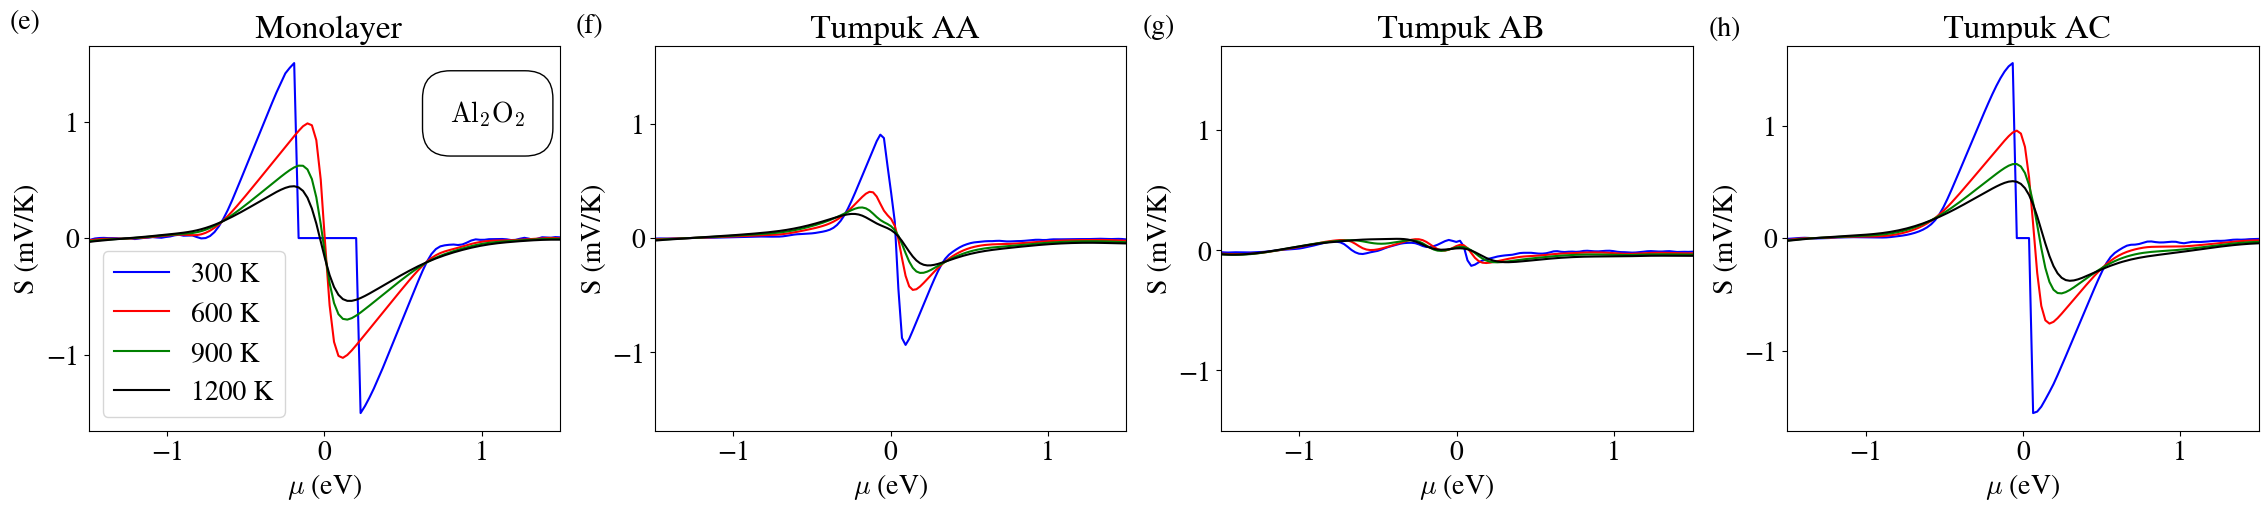

In [46]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_S_M_tvdw,Y3_S_M_tvdw*1000, color ='blue', label='300 K')
axs[0].plot(X6_S_M_tvdw,Y6_S_M_tvdw*1000, color ='red', label='600 K')
axs[0].plot(X9_S_M_tvdw,Y9_S_M_tvdw*1000, color='green', label ='900 K')
axs[0].plot(X12_S_M_tvdw,Y12_S_M_tvdw*1000, color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'S (mV/K)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].text(0.8,1,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
axs[0].legend(loc='lower left')
axs[0].set_xlabel(r'$\mu$ (eV)' )

axs[1].plot(X3_S_AA_vdw,Y3_S_AA_vdw*1000, color ='blue', linestyle='solid')
axs[1].plot(X6_S_AA_vdw,Y6_S_AA_vdw*1000, color ='red', linestyle='solid')
axs[1].plot(X9_S_AA_vdw,Y9_S_AA_vdw*1000, color='green', linestyle='solid')
axs[1].plot(X12_S_AA_vdw,Y12_S_AA_vdw*1000, color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'S (mV/K)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_xlabel(r'$\mu$ (eV)' )

axs[2].plot(X3_S_AB_vdw,Y3_S_AB_vdw*1000, color ='blue', linestyle='solid')
axs[2].plot(X6_S_AB_vdw,Y6_S_AB_vdw*1000, color ='red', linestyle='solid')
axs[2].plot(X9_S_AB_vdw,Y9_S_AB_vdw*1000, color='green', linestyle='solid')
axs[2].plot(X12_S_AB_vdw,Y12_S_AB_vdw*1000, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'S (mV/K)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([-1.5, 1.7])
axs[2].set_xlabel(r'$\mu$ (eV)' )


axs[3].plot(X3_S_AC_vdw,Y3_S_AC_vdw*1000, color ='blue', linestyle='solid')
axs[3].plot(X6_S_AC_vdw,Y6_S_AC_vdw*1000, color ='red', linestyle='solid')
axs[3].plot(X9_S_AC_vdw,Y9_S_AC_vdw*1000, color='green', linestyle='solid')
axs[3].plot(X12_S_AC_vdw,Y12_S_AC_vdw*1000, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'S (mV/K)' )
axs[3].set_xlim([-1.5,1.5])
axs[3].set_xlabel(r'$\mu$ (eV)' )

axs[0].text(-2.0, 1.8,'(e)')
axs[1].text(-2.0, 1.8,'(f)')
axs[2].text(-2.0, 1.8,'(g)')
axs[3].text(-2.0, 1.8,'(h)')
plt.savefig('seebeck_al2o2_ppt.jpeg', bbox_inches='tight')
plt.show()

In [47]:
# data konduktivitas listrik
X3_s_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_s_M_tvdw=datM_tvdw300.iloc[:,5]
X6_s_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_s_M_tvdw=datM_tvdw600.iloc[:,5]
X9_s_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_s_M_tvdw=datM_tvdw900.iloc[:,5]
X12_s_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_s_M_tvdw=datM_tvdw1200.iloc[:,5]

X3_s_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_s_AA_tvdw=datAA_tvdw300.iloc[:,5]
X6_s_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_s_AA_tvdw=datAA_tvdw600.iloc[:,5]
X9_s_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_s_AA_tvdw=datAA_tvdw900.iloc[:,5]
X12_s_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_s_AA_tvdw=datAA_tvdw1200.iloc[:,5]

X3_s_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_s_AB_tvdw=datAB_tvdw300.iloc[:,5]
X6_s_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_s_AB_tvdw=datAB_tvdw600.iloc[:,5]
X9_s_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_s_AB_tvdw=datAB_tvdw900.iloc[:,5]
X12_s_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_s_AB_tvdw=datAB_tvdw1200.iloc[:,5]

X3_s_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_s_AC_tvdw=datAC_tvdw300.iloc[:,5]
X6_s_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_s_AC_tvdw=datAC_tvdw600.iloc[:,5]
X9_s_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_s_AC_tvdw=datAC_tvdw900.iloc[:,5]
X12_s_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_s_AC_tvdw=datAC_tvdw1200.iloc[:,5]

X3_s_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_s_M_vdw=datM_vdw300.iloc[:,5]
X6_s_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_s_M_vdw=datM_vdw600.iloc[:,5]
X9_s_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_s_M_vdw=datM_vdw900.iloc[:,5]
X12_s_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_s_M_vdw=datM_vdw1200.iloc[:,5]

X3_s_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_s_AA_vdw=datAA_vdw300.iloc[:,5]
X6_s_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_s_AA_vdw=datAA_vdw600.iloc[:,5]
X9_s_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_s_AA_vdw=datAA_vdw900.iloc[:,5]
X12_s_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_s_AA_vdw=datAA_vdw1200.iloc[:,5]

X3_s_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_s_AB_vdw=datAB_vdw300.iloc[:,5]
X6_s_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_s_AB_vdw=datAB_vdw600.iloc[:,5]
X9_s_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_s_AB_vdw=datAB_vdw900.iloc[:,5]
X12_s_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_s_AB_vdw=datAB_vdw1200.iloc[:,5]

X3_s_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_s_AC_vdw=datAC_vdw300.iloc[:,5]
X6_s_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_s_AC_vdw=datAC_vdw600.iloc[:,5]
X9_s_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_s_AC_vdw=datAC_vdw900.iloc[:,5]
X12_s_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_s_AC_vdw=datAC_vdw1200.iloc[:,5]

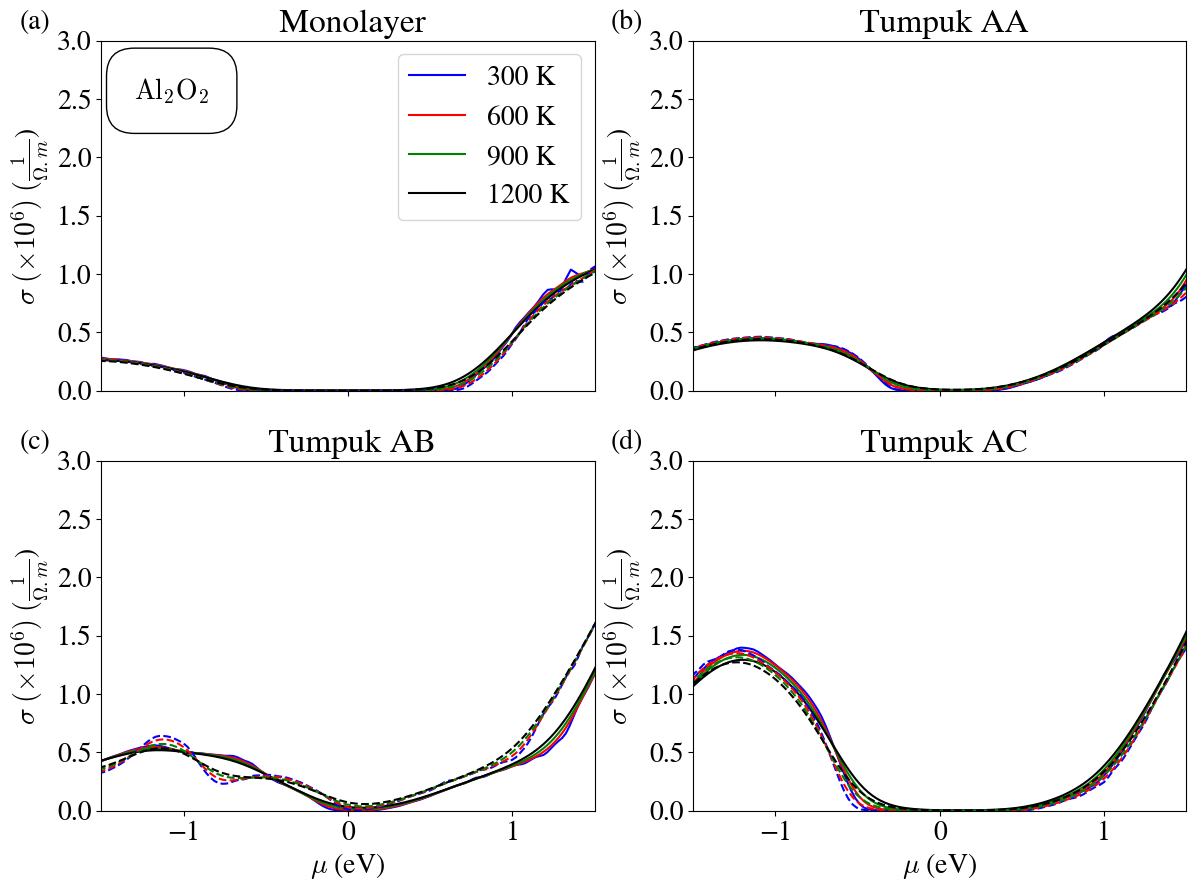

In [48]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_s_M_tvdw,Y3_s_M_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[0][0].plot(X6_s_M_tvdw,Y6_s_M_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[0][0].plot(X9_s_M_tvdw,Y9_s_M_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[0][0].plot(X12_s_M_tvdw,Y12_s_M_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[0][0].plot(X3_s_M_vdw,Y3_s_M_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[0][0].plot(X6_s_M_vdw,Y6_s_M_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[0][0].plot(X9_s_M_vdw,Y9_s_M_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[0][0].plot(X12_s_M_vdw,Y12_s_M_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,3])
axs[0][0].legend()
axs[0][0].text(-1.3,2.5,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_s_AA_tvdw,Y3_s_AA_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[0][1].plot(X6_s_AA_tvdw,Y6_s_AA_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[0][1].plot(X9_s_AA_tvdw,Y9_s_AA_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[0][1].plot(X12_s_AA_tvdw,Y12_s_AA_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[0][1].plot(X3_s_AA_vdw,Y3_s_AA_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[0][1].plot(X6_s_AA_vdw,Y6_s_AA_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[0][1].plot(X9_s_AA_vdw,Y9_s_AA_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[0][1].plot(X12_s_AA_vdw,Y12_s_AA_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,3])

axs[1][0].plot(X3_s_AB_tvdw,Y3_s_AB_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[1][0].plot(X6_s_AB_tvdw,Y6_s_AB_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[1][0].plot(X9_s_AB_tvdw,Y9_s_AB_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[1][0].plot(X12_s_AB_tvdw,Y12_s_AB_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[1][0].plot(X3_s_AB_vdw,Y3_s_AB_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[1][0].plot(X6_s_AB_vdw,Y6_s_AB_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[1][0].plot(X9_s_AB_vdw,Y9_s_AB_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[1][0].plot(X12_s_AB_vdw,Y12_s_AB_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,3])

axs[1][1].plot(X3_s_AC_tvdw,Y3_s_AC_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[1][1].plot(X6_s_AC_tvdw,Y6_s_AC_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[1][1].plot(X9_s_AC_tvdw,Y9_s_AC_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[1][1].plot(X12_s_AC_tvdw,Y12_s_AC_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[1][1].plot(X3_s_AC_vdw,Y3_s_AC_vdw*tau*1e-6 , color ='blue', linestyle='dashed')
axs[1][1].plot(X6_s_AC_vdw,Y6_s_AC_vdw*tau*1e-6 , color ='red', linestyle='dashed')
axs[1][1].plot(X9_s_AC_vdw,Y9_s_AC_vdw*tau*1e-6 , color='green', linestyle='dashed')
axs[1][1].plot(X12_s_AC_vdw,Y12_s_AC_vdw*tau*1e-6 , color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,3])
axs[0][0].text(-2.0, 3.1,'(a)')
axs[0][1].text(-2.0, 3.1,'(b)')
axs[1][0].text(-2.0, 3.1,'(c)')
axs[1][1].text(-2.0, 3.1,'(d)')
# plt.savefig('sigma_al2o2.pdf', bbox_inches='tight')
plt.show()

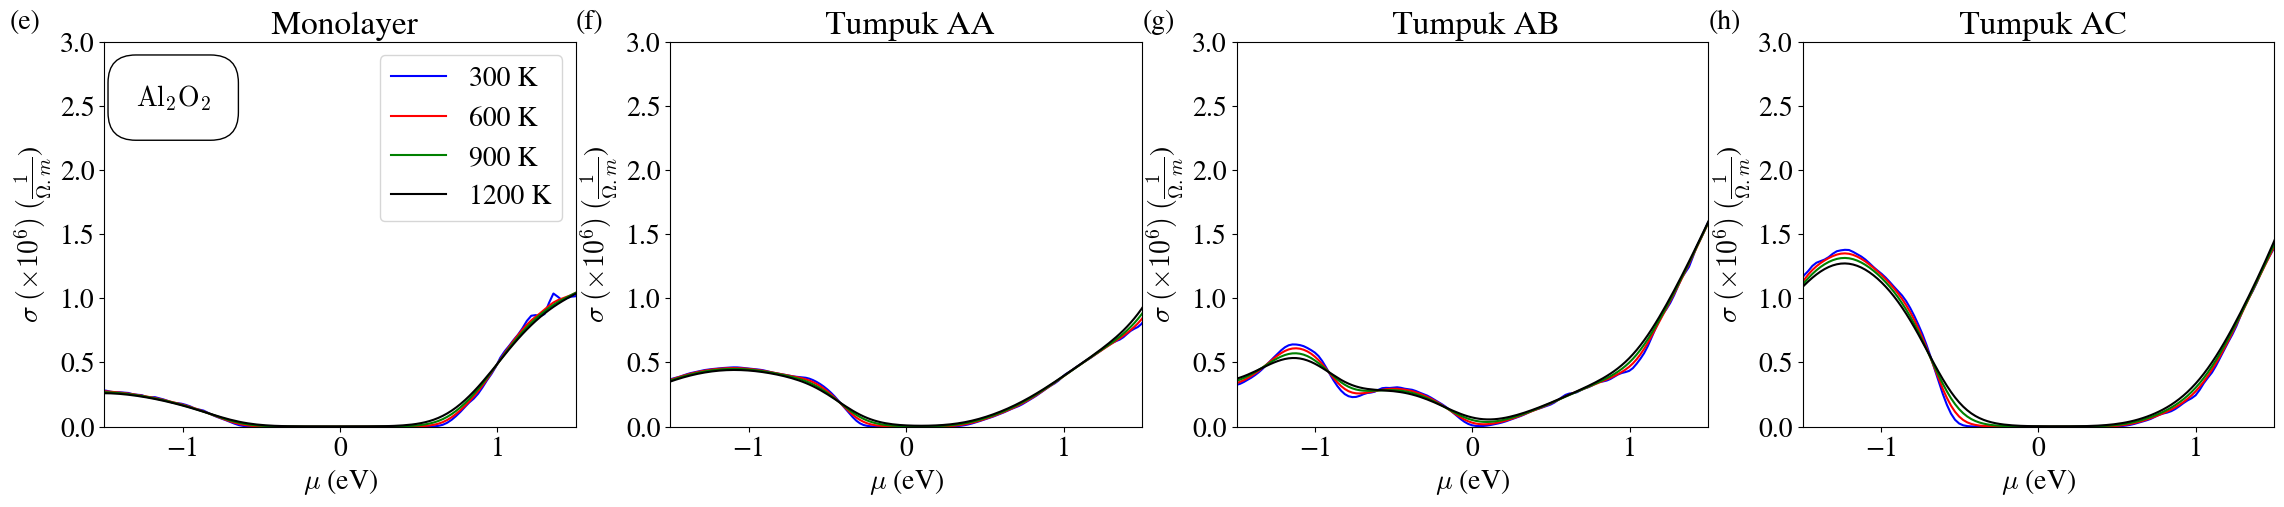

In [49]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_s_M_tvdw,Y3_s_M_tvdw*tau*1e-6 , color ='blue', label='300 K')
axs[0].plot(X6_s_M_tvdw,Y6_s_M_tvdw*tau*1e-6 , color ='red', label='600 K')
axs[0].plot(X9_s_M_tvdw,Y9_s_M_tvdw*tau*1e-6 , color='green', label ='900 K')
axs[0].plot(X12_s_M_tvdw,Y12_s_M_tvdw*tau*1e-6 , color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,3])
axs[0].legend()
axs[0].text(-1.3,2.5,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[1].plot(X3_s_AA_vdw,Y3_s_AA_vdw*tau*1e-6 , color ='blue', linestyle='solid')
axs[1].plot(X6_s_AA_vdw,Y6_s_AA_vdw*tau*1e-6 , color ='red', linestyle='solid')
axs[1].plot(X9_s_AA_vdw,Y9_s_AA_vdw*tau*1e-6 , color='green', linestyle='solid')
axs[1].plot(X12_s_AA_vdw,Y12_s_AA_vdw*tau*1e-6 , color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,3])

axs[2].plot(X3_s_AB_vdw,Y3_s_AB_vdw*tau*1e-6 , color ='blue', linestyle='solid')
axs[2].plot(X6_s_AB_vdw,Y6_s_AB_vdw*tau*1e-6 , color ='red', linestyle='solid')
axs[2].plot(X9_s_AB_vdw,Y9_s_AB_vdw*tau*1e-6 , color='green', linestyle='solid')
axs[2].plot(X12_s_AB_vdw,Y12_s_AB_vdw*tau*1e-6 , color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,3])

axs[3].plot(X3_s_AC_vdw,Y3_s_AC_vdw*tau*1e-6 , color ='blue', linestyle='solid')
axs[3].plot(X6_s_AC_vdw,Y6_s_AC_vdw*tau*1e-6 , color ='red', linestyle='solid')
axs[3].plot(X9_s_AC_vdw,Y9_s_AC_vdw*tau*1e-6 , color='green', linestyle='solid')
axs[3].plot(X12_s_AC_vdw,Y12_s_AC_vdw*tau*1e-6 , color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'$\sigma$ $(\times 10^{6})$ $(\frac{1}{\Omega.m}$)' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,3])
axs[0].text(-2.1, 3.1,'(e)')
axs[1].text(-2.1, 3.1,'(f)')
axs[2].text(-2.1, 3.1,'(g)')
axs[3].text(-2.1, 3.1,'(h)')
plt.savefig('sigma_al2o2_ppt.jpeg', bbox_inches='tight')
plt.show()

In [50]:
# # data konduktivitas termal
# X3_kappa=datM_tvdw300.iloc[:,0]*13.6057-E_Fermi
# Y3_kappa=datM_tvdw300.iloc[:,7]#1e-15
# X6_kappa=datM_tvdw600.iloc[:,0]*13.6057-E_Fermi
# Y6_kappa=datM_tvdw600.iloc[:,7]#1e-15
# X9_kappa=datM_tvdw900.iloc[:,0]*13.6057-E_Fermi
# Y9_kappa=datM_tvdw900.iloc[:,7]#1e-15
# X12_kappa=datM_tvdw1200.iloc[:,0]*13.6057-E_Fermi
# Y12_kappa=datM_tvdw1200.iloc[:,7]#1e-15

In [51]:
#data konduktivitas termal
X3_k_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_k_M_tvdw=datM_tvdw300.iloc[:,7]
X6_k_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_k_M_tvdw=datM_tvdw600.iloc[:,7]
X9_k_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_k_M_tvdw=datM_tvdw900.iloc[:,7]
X12_k_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_k_M_tvdw=datM_tvdw1200.iloc[:,7]

X3_k_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_k_AA_tvdw=datAA_tvdw300.iloc[:,7]
X6_k_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_k_AA_tvdw=datAA_tvdw600.iloc[:,7]
X9_k_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_k_AA_tvdw=datAA_tvdw900.iloc[:,7]
X12_k_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_k_AA_tvdw=datAA_tvdw1200.iloc[:,7]

X3_k_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_k_AB_tvdw=datAB_tvdw300.iloc[:,7]
X6_k_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_k_AB_tvdw=datAB_tvdw600.iloc[:,7]
X9_k_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_k_AB_tvdw=datAB_tvdw900.iloc[:,7]
X12_k_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_k_AB_tvdw=datAB_tvdw1200.iloc[:,7]

X3_k_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_k_AC_tvdw=datAC_tvdw300.iloc[:,7]
X6_k_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_k_AC_tvdw=datAC_tvdw600.iloc[:,7]
X9_k_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_k_AC_tvdw=datAC_tvdw900.iloc[:,7]
X12_k_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_k_AC_tvdw=datAC_tvdw1200.iloc[:,7]

X3_k_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_k_M_vdw=datM_vdw300.iloc[:,7]
X6_k_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_k_M_vdw=datM_vdw600.iloc[:,7]
X9_k_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_k_M_vdw=datM_vdw900.iloc[:,7]
X12_k_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_k_M_vdw=datM_vdw1200.iloc[:,7]

X3_k_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_k_AA_vdw=datAA_vdw300.iloc[:,7]
X6_k_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_k_AA_vdw=datAA_vdw600.iloc[:,7]
X9_k_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_k_AA_vdw=datAA_vdw900.iloc[:,7]
X12_k_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_k_AA_vdw=datAA_vdw1200.iloc[:,7]

X3_k_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_k_AB_vdw=datAB_vdw300.iloc[:,7]
X6_k_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_k_AB_vdw=datAB_vdw600.iloc[:,7]
X9_k_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_k_AB_vdw=datAB_vdw900.iloc[:,7]
X12_k_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_k_AB_vdw=datAB_vdw1200.iloc[:,7]

X3_k_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_k_AC_vdw=datAC_vdw300.iloc[:,7]
X6_k_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_k_AC_vdw=datAC_vdw600.iloc[:,7]
X9_k_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_k_AC_vdw=datAC_vdw900.iloc[:,7]
X12_k_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_k_AC_vdw=datAC_vdw1200.iloc[:,7]

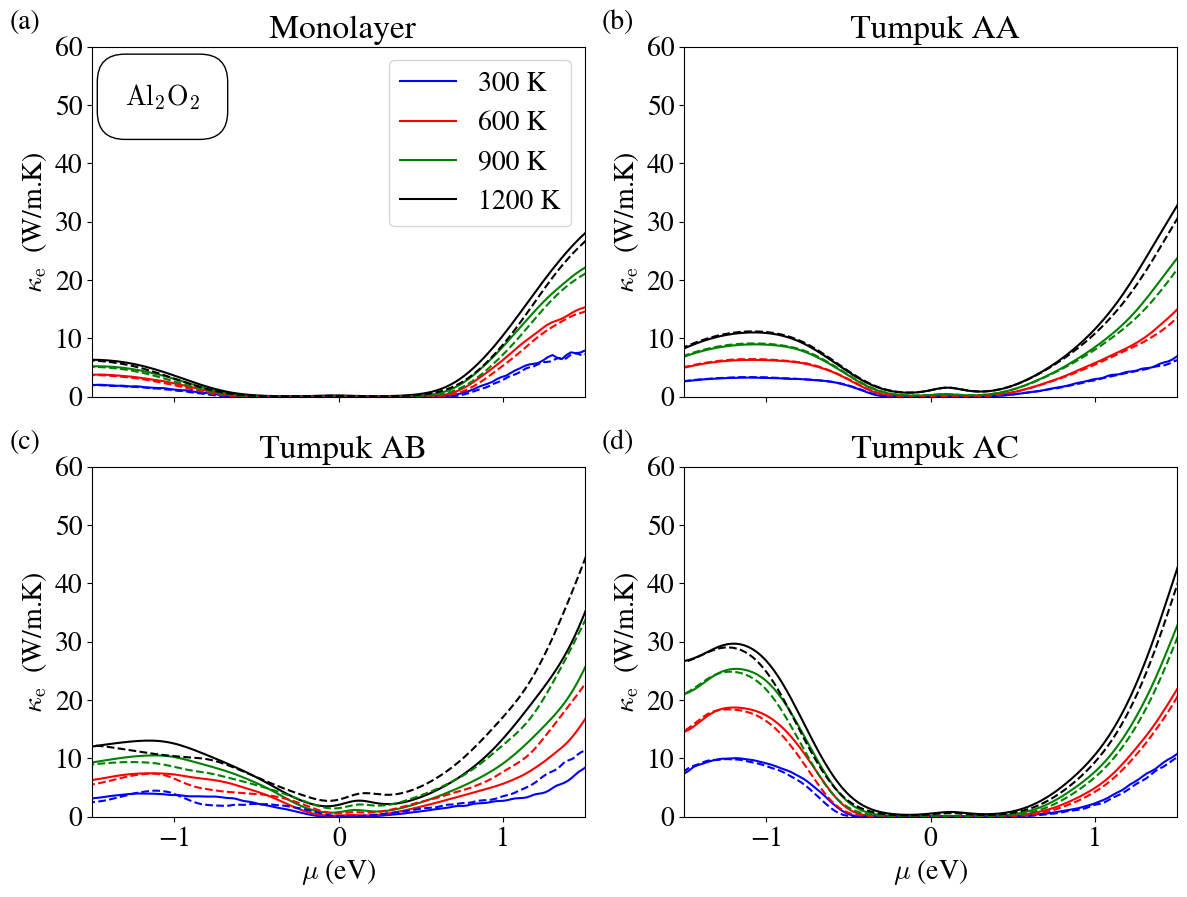

In [52]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_k_M_tvdw,Y3_k_M_tvdw*tau , color ='blue', label='300 K')
axs[0][0].plot(X6_k_M_tvdw,Y6_k_M_tvdw*tau , color ='red', label='600 K')
axs[0][0].plot(X9_k_M_tvdw,Y9_k_M_tvdw*tau , color='green', label ='900 K')
axs[0][0].plot(X12_k_M_tvdw,Y12_k_M_tvdw*tau , color='black', label ='1200 K')
axs[0][0].plot(X3_k_M_vdw,Y3_k_M_vdw*tau , color ='blue', linestyle='dashed')
axs[0][0].plot(X6_k_M_vdw,Y6_k_M_vdw*tau , color ='red', linestyle='dashed')
axs[0][0].plot(X9_k_M_vdw,Y9_k_M_vdw*tau , color='green', linestyle='dashed')
axs[0][0].plot(X12_k_M_vdw,Y12_k_M_vdw*tau , color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,60])
axs[0][0].legend()
axs[0][0].text(-1.3,50,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_k_AA_tvdw,Y3_k_AA_tvdw*tau , color ='blue', label='300 K')
axs[0][1].plot(X6_k_AA_tvdw,Y6_k_AA_tvdw*tau , color ='red', label='600 K')
axs[0][1].plot(X9_k_AA_tvdw,Y9_k_AA_tvdw*tau , color='green', label ='900 K')
axs[0][1].plot(X12_k_AA_tvdw,Y12_k_AA_tvdw*tau , color='black', label ='1200 K')
axs[0][1].plot(X3_k_AA_vdw,Y3_k_AA_vdw*tau , color ='blue', linestyle='dashed')
axs[0][1].plot(X6_k_AA_vdw,Y6_k_AA_vdw*tau , color ='red', linestyle='dashed')
axs[0][1].plot(X9_k_AA_vdw,Y9_k_AA_vdw*tau , color='green', linestyle='dashed')
axs[0][1].plot(X12_k_AA_vdw,Y12_k_AA_vdw*tau , color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,60])

axs[1][0].plot(X3_k_AB_tvdw,Y3_k_AB_tvdw*tau , color ='blue', label='300 K')
axs[1][0].plot(X6_k_AB_tvdw,Y6_k_AB_tvdw*tau , color ='red', label='600 K')
axs[1][0].plot(X9_k_AB_tvdw,Y9_k_AB_tvdw*tau , color='green', label ='900 K')
axs[1][0].plot(X12_k_AB_tvdw,Y12_k_AB_tvdw*tau, color='black', label ='1200 K')
axs[1][0].plot(X3_k_AB_vdw,Y3_k_AB_vdw*tau , color ='blue', linestyle='dashed')
axs[1][0].plot(X6_k_AB_vdw,Y6_k_AB_vdw*tau , color ='red', linestyle='dashed')
axs[1][0].plot(X9_k_AB_vdw,Y9_k_AB_vdw*tau , color='green', linestyle='dashed')
axs[1][0].plot(X12_k_AB_vdw,Y12_k_AB_vdw*tau, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,60])

axs[1][1].plot(X3_k_AC_tvdw,Y3_k_AC_tvdw*tau , color ='blue', label='300 K')
axs[1][1].plot(X6_k_AC_tvdw,Y6_k_AC_tvdw*tau , color ='red', label='600 K')
axs[1][1].plot(X9_k_AC_tvdw,Y9_k_AC_tvdw*tau , color='green', label ='900 K')
axs[1][1].plot(X12_k_AC_tvdw,Y12_k_AC_tvdw*tau, color='black', label ='1200 K')
axs[1][1].plot(X3_k_AC_vdw,Y3_k_AC_vdw*tau , color ='blue', linestyle='dashed')
axs[1][1].plot(X6_k_AC_vdw,Y6_k_AC_vdw*tau , color ='red', linestyle='dashed')
axs[1][1].plot(X9_k_AC_vdw,Y9_k_AC_vdw*tau , color='green', linestyle='dashed')
axs[1][1].plot(X12_k_AC_vdw,Y12_k_AC_vdw*tau, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,60])

axs[0][0].text(-2.0, 63,'(a)')
axs[0][1].text(-2.0, 63,'(b)')
axs[1][0].text(-2.0, 63,'(c)')
axs[1][1].text(-2.0, 63,'(d)')
plt.savefig('kappa_e_al2o2.pdf', bbox_inches='tight')
plt.show()

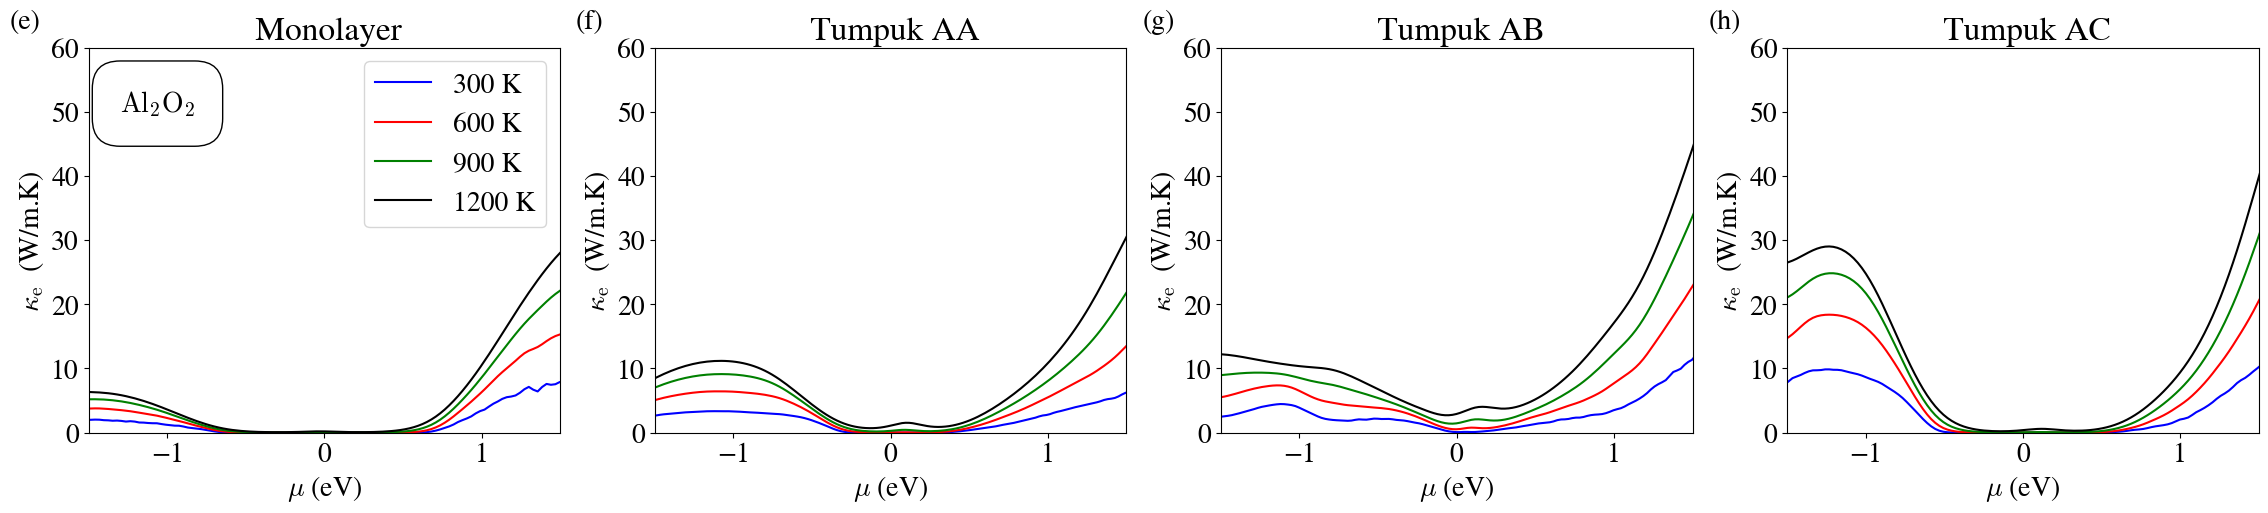

In [53]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_k_M_tvdw,Y3_k_M_tvdw*tau , color ='blue', label='300 K')
axs[0].plot(X6_k_M_tvdw,Y6_k_M_tvdw*tau , color ='red', label='600 K')
axs[0].plot(X9_k_M_tvdw,Y9_k_M_tvdw*tau , color='green', label ='900 K')
axs[0].plot(X12_k_M_tvdw,Y12_k_M_tvdw*tau , color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,60])
axs[0].legend()
axs[0].text(-1.3,50,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))


axs[1].plot(X3_k_AA_vdw,Y3_k_AA_vdw*tau , color ='blue', linestyle='solid')
axs[1].plot(X6_k_AA_vdw,Y6_k_AA_vdw*tau , color ='red', linestyle='solid')
axs[1].plot(X9_k_AA_vdw,Y9_k_AA_vdw*tau , color='green', linestyle='solid')
axs[1].plot(X12_k_AA_vdw,Y12_k_AA_vdw*tau , color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,60])

axs[2].plot(X3_k_AB_vdw,Y3_k_AB_vdw*tau , color ='blue', linestyle='solid')
axs[2].plot(X6_k_AB_vdw,Y6_k_AB_vdw*tau , color ='red', linestyle='solid')
axs[2].plot(X9_k_AB_vdw,Y9_k_AB_vdw*tau , color='green', linestyle='solid')
axs[2].plot(X12_k_AB_vdw,Y12_k_AB_vdw*tau, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,60])

axs[3].plot(X3_k_AC_vdw,Y3_k_AC_vdw*tau , color ='blue', linestyle='solid')
axs[3].plot(X6_k_AC_vdw,Y6_k_AC_vdw*tau , color ='red', linestyle='solid')
axs[3].plot(X9_k_AC_vdw,Y9_k_AC_vdw*tau , color='green', linestyle='solid')
axs[3].plot(X12_k_AC_vdw,Y12_k_AC_vdw*tau, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'$\kappa_\mathrm{e}$  (W/m.K)' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,60])

axs[0].text(-2.0, 63,'(e)')
axs[1].text(-2.0, 63,'(f)')
axs[2].text(-2.0, 63,'(g)')
axs[3].text(-2.0, 63,'(h)')
plt.savefig('kappa_e_al2o2_ppt.jpeg', bbox_inches='tight')
plt.show()

In [54]:
# data ZTe
X3_ZTe_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_ZTe_M_tvdw=(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,5])*300*0.1/datM_tvdw300.iloc[:,7]
X6_ZTe_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_ZTe_M_tvdw=(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,5])*600*0.1/datM_tvdw600.iloc[:,7]
X9_ZTe_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_ZTe_M_tvdw=(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,5])*900*0.1/datM_tvdw900.iloc[:,7]
X12_ZTe_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_ZTe_M_tvdw=(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,5])*1200*0.1/datM_tvdw1200.iloc[:,7]

X3_ZTe_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_ZTe_AA_tvdw=(datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,5])*300*0.1/datAA_tvdw300.iloc[:,7]
X6_ZTe_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_ZTe_AA_tvdw=(datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,5])*600*0.1/datAA_tvdw600.iloc[:,7]
X9_ZTe_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_ZTe_AA_tvdw=(datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,5])*900*0.1/datAA_tvdw900.iloc[:,7]
X12_ZTe_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_ZTe_AA_tvdw=(datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,5])*1200*0.1/datAA_tvdw1200.iloc[:,7]

X3_ZTe_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_ZTe_AB_tvdw=(datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,5])*300*0.1/datAB_tvdw300.iloc[:,7]
X6_ZTe_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_ZTe_AB_tvdw=(datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,5])*600*0.1/datAB_tvdw600.iloc[:,7]
X9_ZTe_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_ZTe_AB_tvdw=(datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,5])*900*0.1/datAB_tvdw900.iloc[:,7]
X12_ZTe_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_ZTe_AB_tvdw=(datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,5])*1200*0.1/datAB_tvdw1200.iloc[:,7]

X3_ZTe_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_ZTe_AC_tvdw=(datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,5])*300*0.1/datAC_tvdw300.iloc[:,7]
X6_ZTe_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_ZTe_AC_tvdw=(datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,5])*600*0.1/datAC_tvdw600.iloc[:,7]
X9_ZTe_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_ZTe_AC_tvdw=(datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,5])*900*0.1/datAC_tvdw900.iloc[:,7]
X12_ZTe_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_ZTe_AC_tvdw=(datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,5])*1200*0.1/datAC_tvdw1200.iloc[:,7]

X3_ZTe_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_ZTe_M_vdw=(datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,5])*300*0.1/datM_vdw300.iloc[:,7]
X6_ZTe_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_ZTe_M_vdw=(datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,5])*600*0.1/datM_vdw600.iloc[:,7]
X9_ZTe_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_ZTe_M_vdw=(datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,5])*900*0.1/datM_vdw900.iloc[:,7]
X12_ZTe_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_ZTe_M_vdw=(datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,5])*1200*0.1/datM_vdw1200.iloc[:,7]

X3_ZTe_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_ZTe_AA_vdw=(datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,5])*300*0.1/datAA_vdw300.iloc[:,7]
X6_ZTe_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_ZTe_AA_vdw=(datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,5])*600*0.1/datAA_vdw600.iloc[:,7]
X9_ZTe_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_ZTe_AA_vdw=(datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,5])*900*0.1/datAA_vdw900.iloc[:,7]
X12_ZTe_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_ZTe_AA_vdw=(datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,5])*1200*0.1/datAA_vdw1200.iloc[:,7]

X3_ZTe_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_ZTe_AB_vdw=(datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,5])*300*0.1/datAB_vdw300.iloc[:,7]
X6_ZTe_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_ZTe_AB_vdw=(datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,5])*600*0.1/datAB_vdw600.iloc[:,7]
X9_ZTe_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_ZTe_AB_vdw=(datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,5])*900*0.1/datAB_vdw900.iloc[:,7]
X12_ZTe_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_ZTe_AB_vdw=(datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,5])*1200*0.1/datAB_vdw1200.iloc[:,7]

X3_ZTe_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_ZTe_AC_vdw=(datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,5])*300*0.1/datAC_vdw300.iloc[:,7]
X6_ZTe_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_ZTe_AC_vdw=(datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,5])*600*0.1/datAC_vdw600.iloc[:,7]
X9_ZTe_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_ZTe_AC_vdw=(datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,5])*900*0.1/datAC_vdw900.iloc[:,7]
X12_ZTe_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_ZTe_AC_vdw=(datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,5])*1200*0.1/datAC_vdw1200.iloc[:,7]

In [55]:
# axs[1][1].plot(X3_ZTe_AC_tvdw,Y3_ZTe_AC_tvdw, color ='blue', label='300 K')
# axs[1][1].plot(X6_ZTe_AC_tvdw,Y6_ZTe_AC_tvdw, color ='red', label='600 K')
# axs[1][1].plot(X9_ZTe_AC_tvdw,Y9_ZTe_AC_tvdw, color='green', label ='900 K')
# axs[1][1].plot(X12_ZTe_AC_tvdw,Y12_ZTe_AC_tvdw, color='black', label ='1200 K')
# axs[1][1].set_title(r'$ZT_\mathrm{e}$ of $Al_{2}S_{2}$ non-vdW')
# axs[1][1].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# axs[1][1].set_xlim([-1.5, 1.5])
# axs[1][1].set_ylim([0,4])

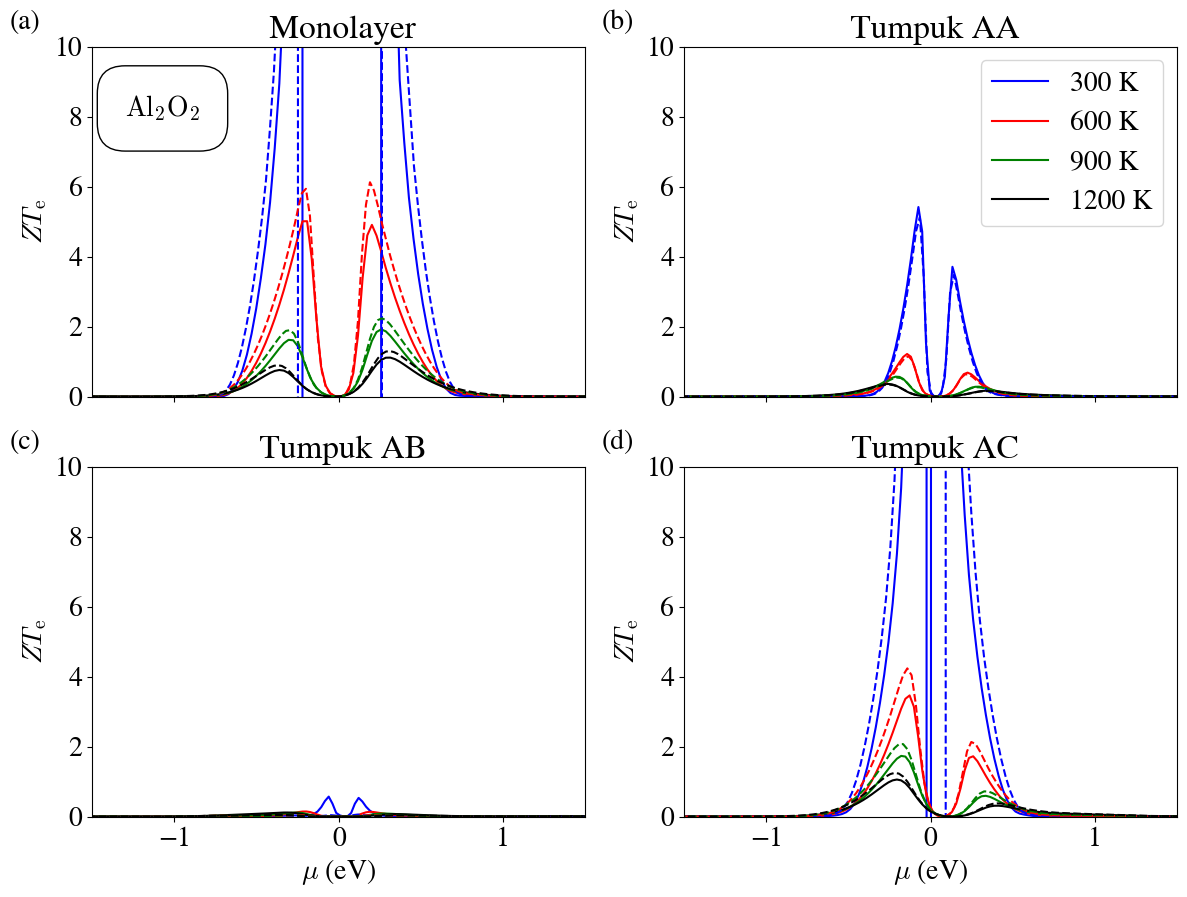

In [56]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
axs[0][0].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
axs[0][0].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
axs[0][0].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')
axs[0][0].plot(X3_ZTe_M_vdw,Y3_ZTe_M_vdw, color ='blue', linestyle='dashed')
axs[0][0].plot(X6_ZTe_M_vdw,Y6_ZTe_M_vdw, color ='red', linestyle='dashed')
axs[0][0].plot(X9_ZTe_M_vdw,Y9_ZTe_M_vdw, color='green', linestyle='dashed')
axs[0][0].plot(X12_ZTe_M_vdw,Y12_ZTe_M_vdw, color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,10])
# axs[0][0].legend()
axs[0][0].text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_ZTe_AA_tvdw,Y3_ZTe_AA_tvdw, color ='blue', label='300 K')
axs[0][1].plot(X6_ZTe_AA_tvdw,Y6_ZTe_AA_tvdw, color ='red', label='600 K')
axs[0][1].plot(X9_ZTe_AA_tvdw,Y9_ZTe_AA_tvdw, color='green', label ='900 K')
axs[0][1].plot(X12_ZTe_AA_tvdw,Y12_ZTe_AA_tvdw, color='black', label ='1200 K')
axs[0][1].plot(X3_ZTe_AA_vdw,Y3_ZTe_AA_vdw, color ='blue', linestyle='dashed')
axs[0][1].plot(X6_ZTe_AA_vdw,Y6_ZTe_AA_vdw, color ='red', linestyle='dashed')
axs[0][1].plot(X9_ZTe_AA_vdw,Y9_ZTe_AA_vdw, color='green', linestyle='dashed')
axs[0][1].plot(X12_ZTe_AA_vdw,Y12_ZTe_AA_vdw, color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,10])
axs[0][1].legend()

axs[1][0].plot(X3_ZTe_AB_tvdw,Y3_ZTe_AB_tvdw, color ='blue', label='300 K')
axs[1][0].plot(X6_ZTe_AB_tvdw,Y6_ZTe_AB_tvdw, color ='red', label='600 K')
axs[1][0].plot(X9_ZTe_AB_tvdw,Y9_ZTe_AB_tvdw, color='green', label ='900 K')
axs[1][0].plot(X12_ZTe_AB_tvdw,Y12_ZTe_AB_tvdw, color='black', label ='1200 K')
axs[1][0].plot(X3_ZTe_AB_vdw,Y3_ZTe_AB_vdw, color ='blue', linestyle='dashed')
axs[1][0].plot(X6_ZTe_AB_vdw,Y6_ZTe_AB_vdw, color ='red', linestyle='dashed')
axs[1][0].plot(X9_ZTe_AB_vdw,Y9_ZTe_AB_vdw, color='green', linestyle='dashed')
axs[1][0].plot(X12_ZTe_AB_vdw,Y12_ZTe_AB_vdw, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,10])

axs[1][1].plot(X3_ZTe_AC_tvdw,Y3_ZTe_AC_tvdw, color ='blue', label='300 K')
axs[1][1].plot(X6_ZTe_AC_tvdw,Y6_ZTe_AC_tvdw, color ='red', label='600 K')
axs[1][1].plot(X9_ZTe_AC_tvdw,Y9_ZTe_AC_tvdw, color='green', label ='900 K')
axs[1][1].plot(X12_ZTe_AC_tvdw,Y12_ZTe_AC_tvdw, color='black', label ='1200 K')
axs[1][1].plot(X3_ZTe_AC_vdw,Y3_ZTe_AC_vdw, color ='blue', linestyle='dashed')
axs[1][1].plot(X6_ZTe_AC_vdw,Y6_ZTe_AC_vdw, color ='red', linestyle='dashed')
axs[1][1].plot(X9_ZTe_AC_vdw,Y9_ZTe_AC_vdw, color='green', linestyle='dashed')
axs[1][1].plot(X12_ZTe_AC_vdw,Y12_ZTe_AC_vdw, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,10])
axs[0][0].text(-2.0, 10.5,'(a)')
axs[0][1].text(-2.0, 10.5,'(b)')
axs[1][0].text(-2.0, 10.5,'(c)')
axs[1][1].text(-2.0, 10.5,'(d)')
plt.savefig('zte_al2o2.pdf', bbox_inches='tight')
plt.show()

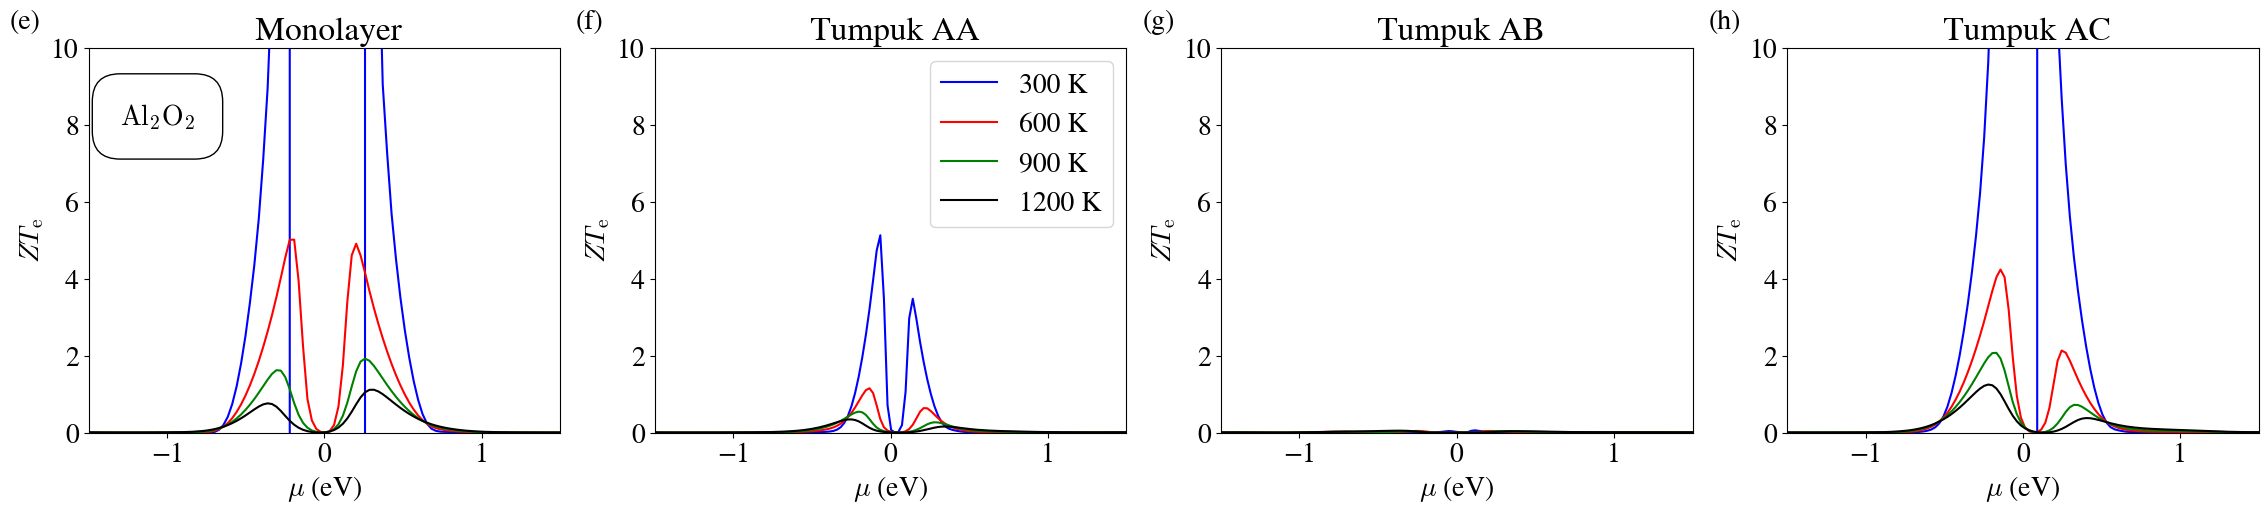

In [58]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
axs[0].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
axs[0].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
axs[0].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,10])
# axs[0].legend()
axs[0].text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[1].plot(X3_ZTe_AA_vdw,Y3_ZTe_AA_vdw, color ='blue', linestyle='solid',label='300 K')
axs[1].plot(X6_ZTe_AA_vdw,Y6_ZTe_AA_vdw, color ='red', linestyle='solid',label='600 K')
axs[1].plot(X9_ZTe_AA_vdw,Y9_ZTe_AA_vdw, color='green', linestyle='solid',label='900 K')
axs[1].plot(X12_ZTe_AA_vdw,Y12_ZTe_AA_vdw, color='black', linestyle='solid',label='1200 K')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,10])
axs[1].legend()


axs[2].plot(X3_ZTe_AB_vdw,Y3_ZTe_AB_vdw, color ='blue', linestyle='solid')
axs[2].plot(X6_ZTe_AB_vdw,Y6_ZTe_AB_vdw, color ='red', linestyle='solid')
axs[2].plot(X9_ZTe_AB_vdw,Y9_ZTe_AB_vdw, color='green', linestyle='solid')
axs[2].plot(X12_ZTe_AB_vdw,Y12_ZTe_AB_vdw, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,10])


axs[3].plot(X3_ZTe_AC_vdw,Y3_ZTe_AC_vdw, color ='blue', linestyle='solid')
axs[3].plot(X6_ZTe_AC_vdw,Y6_ZTe_AC_vdw, color ='red', linestyle='solid')
axs[3].plot(X9_ZTe_AC_vdw,Y9_ZTe_AC_vdw, color='green', linestyle='solid')
axs[3].plot(X12_ZTe_AC_vdw,Y12_ZTe_AC_vdw, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'$ZT_\mathrm{e}$' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,10])
axs[0].text(-2.0, 10.5,'(e)')
axs[1].text(-2.0, 10.5,'(f)')
axs[2].text(-2.0, 10.5,'(g)')
axs[3].text(-2.0, 10.5,'(h)')
plt.savefig('zte_al2o2_ppt.jpeg', bbox_inches='tight')
plt.show()

In [59]:
# data PF
X3_PF_M_tvdw=datM_tvdw300.iloc[:,0]*13.6057-E_FermiM_tvdw
Y3_PF_M_tvdw=(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,5])
X6_PF_M_tvdw=datM_tvdw600.iloc[:,0]*13.6057-E_FermiM_tvdw
Y6_PF_M_tvdw=(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,5])
X9_PF_M_tvdw=datM_tvdw900.iloc[:,0]*13.6057-E_FermiM_tvdw
Y9_PF_M_tvdw=(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,5])
X12_PF_M_tvdw=datM_tvdw1200.iloc[:,0]*13.6057-E_FermiM_tvdw
Y12_PF_M_tvdw=(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,5])

X3_PF_AA_tvdw=datAA_tvdw300.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y3_PF_AA_tvdw=(datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,4]*datAA_tvdw300.iloc[:,5])
X6_PF_AA_tvdw=datAA_tvdw600.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y6_PF_AA_tvdw=(datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,4]*datAA_tvdw600.iloc[:,5])
X9_PF_AA_tvdw=datAA_tvdw900.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y9_PF_AA_tvdw=(datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,4]*datAA_tvdw900.iloc[:,5])
X12_PF_AA_tvdw=datAA_tvdw1200.iloc[:,0]*13.6057-E_FermiAA_tvdw
Y12_PF_AA_tvdw=(datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,4]*datAA_tvdw1200.iloc[:,5])

X3_PF_AB_tvdw=datAB_tvdw300.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y3_PF_AB_tvdw=(datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,4]*datAB_tvdw300.iloc[:,5])
X6_PF_AB_tvdw=datAB_tvdw600.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y6_PF_AB_tvdw=(datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,4]*datAB_tvdw600.iloc[:,5])
X9_PF_AB_tvdw=datAB_tvdw900.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y9_PF_AB_tvdw=(datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,4]*datAB_tvdw900.iloc[:,5])
X12_PF_AB_tvdw=datAB_tvdw1200.iloc[:,0]*13.6057-E_FermiAB_tvdw
Y12_PF_AB_tvdw=(datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,4]*datAB_tvdw1200.iloc[:,5])

X3_PF_AC_tvdw=datAC_tvdw300.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y3_PF_AC_tvdw=(datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,4]*datAC_tvdw300.iloc[:,5])
X6_PF_AC_tvdw=datAC_tvdw600.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y6_PF_AC_tvdw=(datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,4]*datAC_tvdw600.iloc[:,5])
X9_PF_AC_tvdw=datAC_tvdw900.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y9_PF_AC_tvdw=(datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,4]*datAC_tvdw900.iloc[:,5])
X12_PF_AC_tvdw=datAC_tvdw1200.iloc[:,0]*13.6057-E_FermiAC_tvdw
Y12_PF_AC_tvdw=(datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,4]*datAC_tvdw1200.iloc[:,5])

X3_PF_M_vdw=datM_vdw300.iloc[:,0]*13.6057-E_FermiM_vdw
Y3_PF_M_vdw=(datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,4]*datM_vdw300.iloc[:,5])
X6_PF_M_vdw=datM_vdw600.iloc[:,0]*13.6057-E_FermiM_vdw
Y6_PF_M_vdw=(datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,4]*datM_vdw600.iloc[:,5])
X9_PF_M_vdw=datM_vdw900.iloc[:,0]*13.6057-E_FermiM_vdw
Y9_PF_M_vdw=(datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,4]*datM_vdw900.iloc[:,5])
X12_PF_M_vdw=datM_vdw1200.iloc[:,0]*13.6057-E_FermiM_vdw
Y12_PF_M_vdw=(datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,4]*datM_vdw1200.iloc[:,5])

X3_PF_AA_vdw=datAA_vdw300.iloc[:,0]*13.6057-E_FermiAA_vdw
Y3_PF_AA_vdw=(datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,4]*datAA_vdw300.iloc[:,5])
X6_PF_AA_vdw=datAA_vdw600.iloc[:,0]*13.6057-E_FermiAA_vdw
Y6_PF_AA_vdw=(datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,4]*datAA_vdw600.iloc[:,5])
X9_PF_AA_vdw=datAA_vdw900.iloc[:,0]*13.6057-E_FermiAA_vdw
Y9_PF_AA_vdw=(datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,4]*datAA_vdw900.iloc[:,5])
X12_PF_AA_vdw=datAA_vdw1200.iloc[:,0]*13.6057-E_FermiAA_vdw
Y12_PF_AA_vdw=(datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,4]*datAA_vdw1200.iloc[:,5])

X3_PF_AB_vdw=datAB_vdw300.iloc[:,0]*13.6057-E_FermiAB_vdw
Y3_PF_AB_vdw=(datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,4]*datAB_vdw300.iloc[:,5])
X6_PF_AB_vdw=datAB_vdw600.iloc[:,0]*13.6057-E_FermiAB_vdw
Y6_PF_AB_vdw=(datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,4]*datAB_vdw600.iloc[:,5])
X9_PF_AB_vdw=datAB_vdw900.iloc[:,0]*13.6057-E_FermiAB_vdw
Y9_PF_AB_vdw=(datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,4]*datAB_vdw900.iloc[:,5])
X12_PF_AB_vdw=datAB_vdw1200.iloc[:,0]*13.6057-E_FermiAB_vdw
Y12_PF_AB_vdw=(datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,4]*datAB_vdw1200.iloc[:,5])

X3_PF_AC_vdw=datAC_vdw300.iloc[:,0]*13.6057-E_FermiAC_vdw
Y3_PF_AC_vdw=(datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,4]*datAC_vdw300.iloc[:,5])
X6_PF_AC_vdw=datAC_vdw600.iloc[:,0]*13.6057-E_FermiAC_vdw
Y6_PF_AC_vdw=(datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,4]*datAC_vdw600.iloc[:,5])
X9_PF_AC_vdw=datAC_vdw900.iloc[:,0]*13.6057-E_FermiAC_vdw
Y9_PF_AC_vdw=(datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,4]*datAC_vdw900.iloc[:,5])
X12_PF_AC_vdw=datAC_vdw1200.iloc[:,0]*13.6057-E_FermiAC_vdw
Y12_PF_AC_vdw=(datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,4]*datAC_vdw1200.iloc[:,5])

In [60]:
datM_tvdw300.head()

,Ef[Ry],T[K],N[e/uc],DOS(ef)[1/(Ha*uc)],S[V/K],sigma/tau0[1/(ohm*m*s)],RH[m**3/C],kappae/tau0[W/(m*K*s)],cv[J/(mol*K)],chi[m**3/mol]
0,-0.662963,300,11.0378,43.8823,0.000005,5.663150e+19,5.841700e-09,4.100520e+14,0.903352,3.429830e-12
1,-0.660893,300,10.9434,45.8766,0.000015,5.131460e+19,5.530230e-09,3.938150e+14,0.731035,3.585700e-12
2,-0.658824,300,10.8558,42.6398,0.000017,4.676120e+19,2.678780e-09,3.892100e+14,0.701823,3.332710e-12
3,-0.656754,300,10.7889,32.3631,0.000006,4.481040e+19,-3.672060e-09,3.721790e+14,0.770879,2.529490e-12
4,-0.654685,300,10.7449,21.0914,-0.000004,4.420180e+19,-8.730760e-09,3.637300e+14,0.729019,1.648500e-12


In [61]:
tau

1e-14

In [62]:
# Y3_PF_AB_tvdw[921]*tau

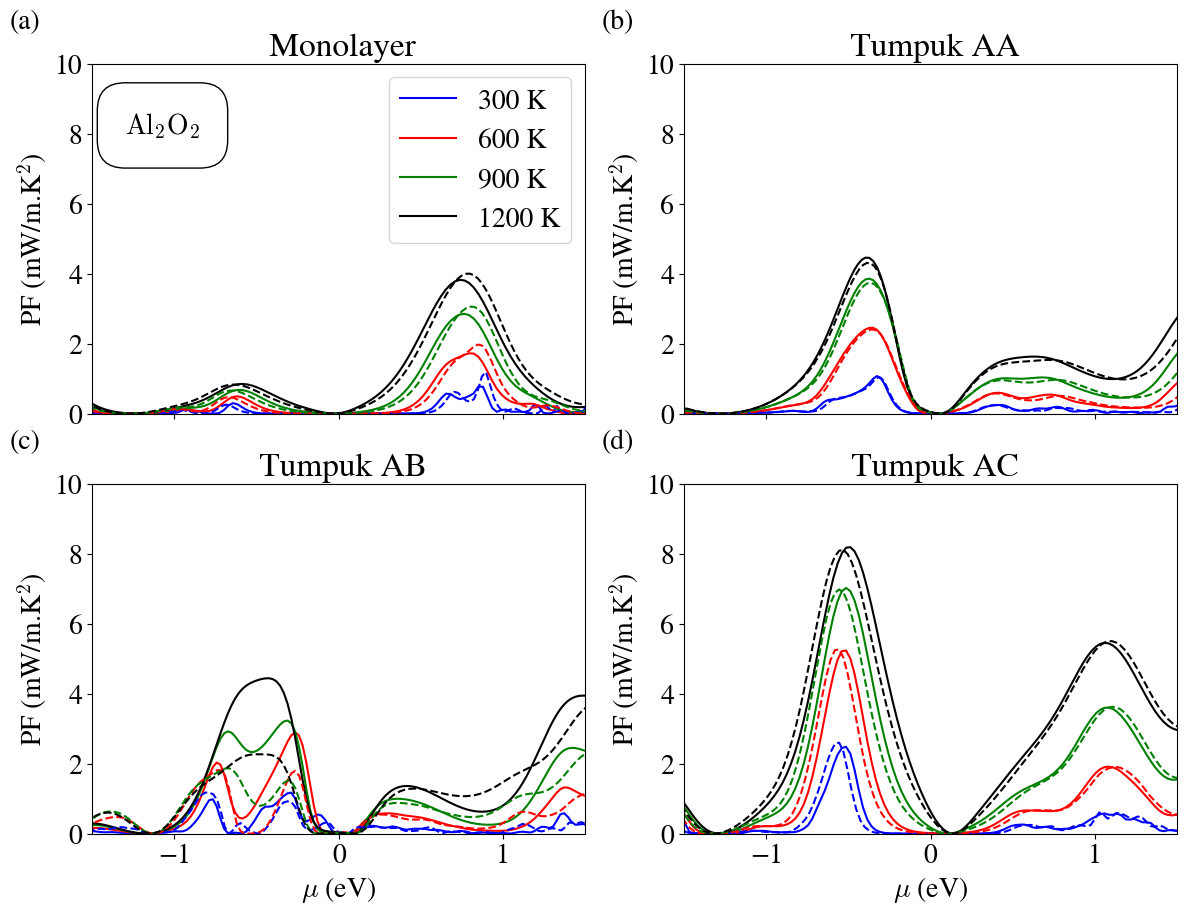

In [63]:
fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
axs[0][0].plot(X3_PF_M_tvdw,Y3_PF_M_tvdw*tau*1000, color ='blue', label='300 K')
axs[0][0].plot(X6_PF_M_tvdw,Y6_PF_M_tvdw*tau*1000, color ='red', label='600 K')
axs[0][0].plot(X9_PF_M_tvdw,Y9_PF_M_tvdw*tau*1000, color='green', label ='900 K')
axs[0][0].plot(X12_PF_M_tvdw,Y12_PF_M_tvdw*tau*1000, color='black', label ='1200 K')
axs[0][0].plot(X3_PF_M_vdw,Y3_PF_M_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[0][0].plot(X6_PF_M_vdw,Y6_PF_M_vdw*tau*1000, color ='red', linestyle='dashed')
axs[0][0].plot(X9_PF_M_vdw,Y9_PF_M_vdw*tau*1000, color='green', linestyle='dashed')
axs[0][0].plot(X12_PF_M_vdw,Y12_PF_M_vdw*tau*1000, color='black', linestyle='dashed')
axs[0][0].set_title(r' Monolayer')
axs[0][0].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[0][0].set_xlabel(r'$\mu$ (eV)' )
axs[0][0].set_xlim([-1.5, 1.5])
axs[0][0].set_ylim([0,10])
axs[0][0].legend()
axs[0][0].text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[0][1].plot(X3_PF_AA_tvdw,Y3_PF_AA_tvdw*tau*1000, color ='blue', label='300 K')
axs[0][1].plot(X6_PF_AA_tvdw,Y6_PF_AA_tvdw*tau*1000, color ='red', label='600 K')
axs[0][1].plot(X9_PF_AA_tvdw,Y9_PF_AA_tvdw*tau*1000, color='green', label ='900 K')
axs[0][1].plot(X12_PF_AA_tvdw,Y12_PF_AA_tvdw*tau*1000, color='black', label ='1200 K')
axs[0][1].plot(X3_PF_AA_vdw,Y3_PF_AA_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[0][1].plot(X6_PF_AA_vdw,Y6_PF_AA_vdw*tau*1000, color ='red', linestyle='dashed')
axs[0][1].plot(X9_PF_AA_vdw,Y9_PF_AA_vdw*tau*1000, color='green', linestyle='dashed')
axs[0][1].plot(X12_PF_AA_vdw,Y12_PF_AA_vdw*tau*1000, color='black', linestyle='dashed')
axs[0][1].set_title(r' Tumpuk AA')
axs[0][1].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[0][1].set_xlabel(r'$\mu$ (eV)' )
axs[0][1].set_xlim([-1.5, 1.5])
axs[0][1].set_ylim([0,10])

axs[1][0].plot(X3_PF_AB_tvdw,Y3_PF_AB_tvdw*tau*1000, color ='blue', label='300 K')
axs[1][0].plot(X6_PF_AB_tvdw,Y6_PF_AB_tvdw*tau*1000, color ='red', label='600 K')
axs[1][0].plot(X9_PF_AB_tvdw,Y9_PF_AB_tvdw*tau*1000, color='green', label ='900 K')
axs[1][0].plot(X12_PF_AB_tvdw,Y12_PF_AB_tvdw*tau*1000, color='black', label ='1200 K')
axs[1][0].plot(X3_PF_AB_vdw,Y3_PF_AB_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[1][0].plot(X6_PF_AB_vdw,Y6_PF_AB_vdw*tau*1000, color ='red', linestyle='dashed')
axs[1][0].plot(X9_PF_AB_vdw,Y9_PF_AB_vdw*tau*1000, color='green', linestyle='dashed')
axs[1][0].plot(X12_PF_AB_vdw,Y12_PF_AB_vdw*tau*1000, color='black', linestyle='dashed')
axs[1][0].set_title(r' Tumpuk AB')
axs[1][0].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[1][0].set_xlabel(r'$\mu$ (eV)' )
axs[1][0].set_xlim([-1.5, 1.5])
axs[1][0].set_ylim([0,10])

axs[1][1].plot(X3_PF_AC_tvdw,Y3_PF_AC_tvdw*tau*1000, color ='blue', label='300 K')
axs[1][1].plot(X6_PF_AC_tvdw,Y6_PF_AC_tvdw*tau*1000, color ='red', label='600 K')
axs[1][1].plot(X9_PF_AC_tvdw,Y9_PF_AC_tvdw*tau*1000, color='green', label ='900 K')
axs[1][1].plot(X12_PF_AC_tvdw,Y12_PF_AC_tvdw*tau*1000, color='black', label ='1200 K')
axs[1][1].plot(X3_PF_AC_vdw,Y3_PF_AC_vdw*tau*1000, color ='blue', linestyle='dashed')
axs[1][1].plot(X6_PF_AC_vdw,Y6_PF_AC_vdw*tau*1000, color ='red', linestyle='dashed')
axs[1][1].plot(X9_PF_AC_vdw,Y9_PF_AC_vdw*tau*1000, color='green', linestyle='dashed')
axs[1][1].plot(X12_PF_AC_vdw,Y12_PF_AC_vdw*tau*1000, color='black', linestyle='dashed')
axs[1][1].set_title(r' Tumpuk AC')
axs[1][1].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[1][1].set_xlabel(r'$\mu$ (eV)' )
axs[1][1].set_xlim([-1.5, 1.5])
axs[1][1].set_ylim([0,10])
axs[0][0].text(-2.0, 11,'(a)')
axs[0][1].text(-2.0, 11,'(b)')
axs[1][0].text(-2.0, 11,'(c)')
axs[1][1].text(-2.0, 11,'(d)')
plt.savefig('pf_al2o2.pdf', bbox_inches='tight')
plt.show()

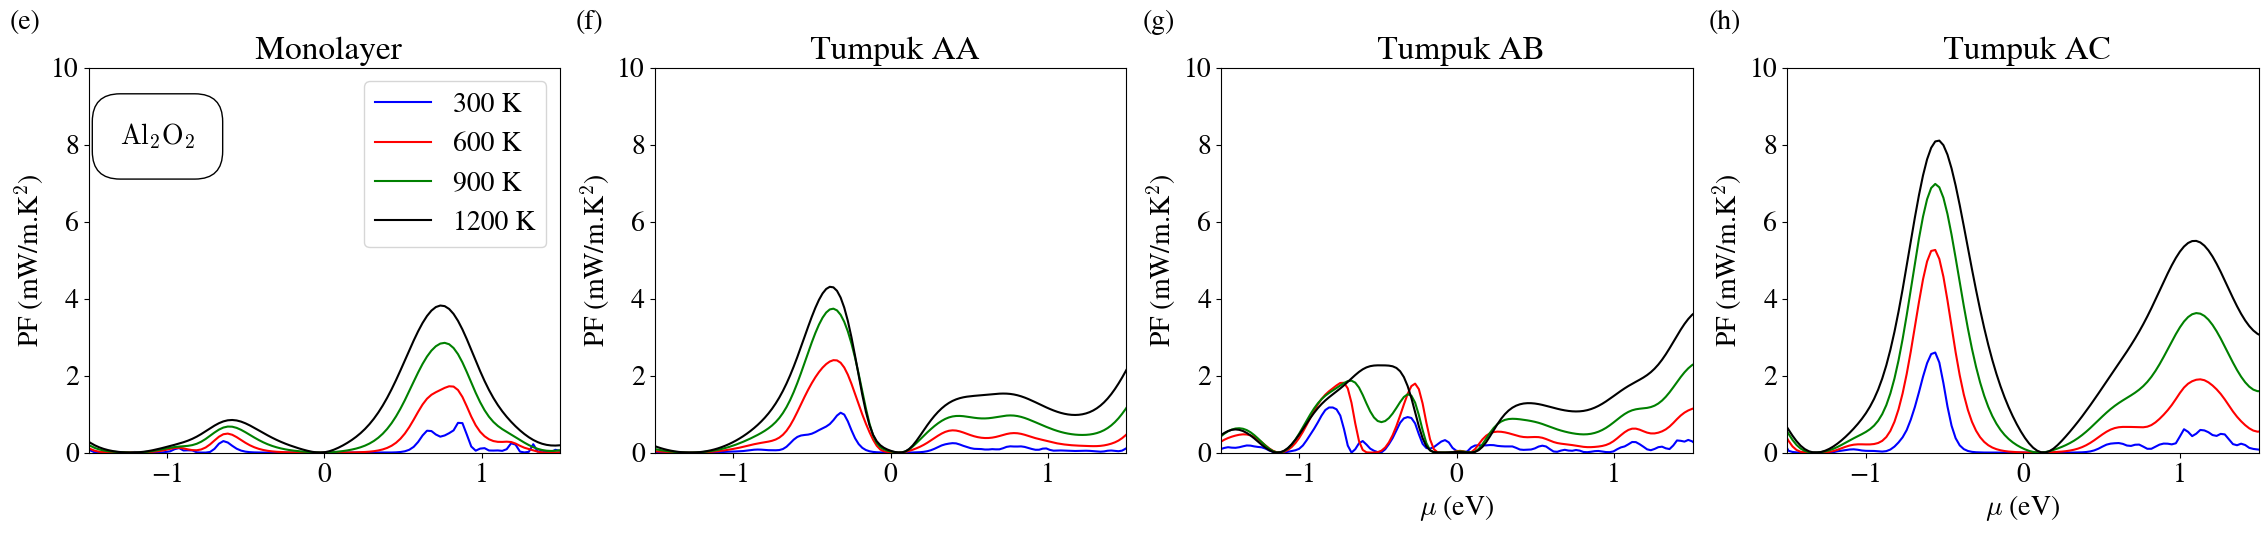

In [108]:
fig, axs = plt.subplots(1,4,figsize=(28,5))
axs[0].plot(X3_PF_M_tvdw,Y3_PF_M_tvdw*tau*1000, color ='blue', label='300 K')
axs[0].plot(X6_PF_M_tvdw,Y6_PF_M_tvdw*tau*1000, color ='red', label='600 K')
axs[0].plot(X9_PF_M_tvdw,Y9_PF_M_tvdw*tau*1000, color='green', label ='900 K')
axs[0].plot(X12_PF_M_tvdw,Y12_PF_M_tvdw*tau*1000, color='black', label ='1200 K')
axs[0].set_title(r' Monolayer')
axs[0].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[0].set_xlabel(r'$\mu$ (eV)' )
axs[0].set_xlim([-1.5, 1.5])
axs[0].set_ylim([0,10])
axs[0].legend()
axs[0].text(-1.3,8,r'$\mathrm{Al}_{2}\mathrm{O}_2$',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

axs[1].plot(X3_PF_AA_vdw,Y3_PF_AA_vdw*tau*1000, color ='blue', linestyle='solid')
axs[1].plot(X6_PF_AA_vdw,Y6_PF_AA_vdw*tau*1000, color ='red', linestyle='solid')
axs[1].plot(X9_PF_AA_vdw,Y9_PF_AA_vdw*tau*1000, color='green', linestyle='solid')
axs[1].plot(X12_PF_AA_vdw,Y12_PF_AA_vdw*tau*1000, color='black', linestyle='solid')
axs[1].set_title(r' Tumpuk AA')
axs[1].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[1].set_xlabel(r'$\mu$ (eV)' )
axs[1].set_xlim([-1.5, 1.5])
axs[1].set_ylim([0,10])

axs[2].plot(X3_PF_AB_vdw,Y3_PF_AB_vdw*tau*1000, color ='blue', linestyle='solid')
axs[2].plot(X6_PF_AB_vdw,Y6_PF_AB_vdw*tau*1000, color ='red', linestyle='solid')
axs[2].plot(X9_PF_AB_vdw,Y9_PF_AB_vdw*tau*1000, color='green', linestyle='solid')
axs[2].plot(X12_PF_AB_vdw,Y12_PF_AB_vdw*tau*1000, color='black', linestyle='solid')
axs[2].set_title(r' Tumpuk AB')
axs[2].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[2].set_xlabel(r'$\mu$ (eV)' )
axs[2].set_xlim([-1.5, 1.5])
axs[2].set_ylim([0,10])

axs[3].plot(X3_PF_AC_vdw,Y3_PF_AC_vdw*tau*1000, color ='blue', linestyle='solid')
axs[3].plot(X6_PF_AC_vdw,Y6_PF_AC_vdw*tau*1000, color ='red', linestyle='solid')
axs[3].plot(X9_PF_AC_vdw,Y9_PF_AC_vdw*tau*1000, color='green', linestyle='solid')
axs[3].plot(X12_PF_AC_vdw,Y12_PF_AC_vdw*tau*1000, color='black', linestyle='solid')
axs[3].set_title(r' Tumpuk AC')
axs[3].set_ylabel(r'PF (mW/m.K$^2$)' )
axs[3].set_xlabel(r'$\mu$ (eV)' )
axs[3].set_xlim([-1.5, 1.5])
axs[3].set_ylim([0,10])
axs[0].text(-2.0, 11,'(e)')
axs[1].text(-2.0, 11,'(f)')
axs[2].text(-2.0, 11,'(g)')
axs[3].text(-2.0, 11,'(h)')
plt.savefig('pf_al2o2_ppt.jpeg', bbox_inches='tight')
plt.show()

In [65]:
# fig, axs = plt.subplots(2,2,figsize=(14,10),sharex=True)
# axs[0][0].plot(X3_PF_M_tvdw,Y3_PF_M_tvdw*tau*1000, color ='blue', label='300 K')
# axs[0][0].plot(X6_PF_M_tvdw,Y6_PF_M_tvdw*tau*1000, color ='red', label='600 K')
# axs[0][0].plot(X9_PF_M_tvdw,Y9_PF_M_tvdw*tau*1000, color='green', label ='900 K')
# axs[0][0].plot(X12_PF_M_tvdw,Y12_PF_M_tvdw*tau*1000, color='black', label ='1200 K')
# axs[0][0].set_title(r' Monolayer')
# axs[0][0].set_ylabel(r'PF (mW/m.K$^2$)' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
# axs[0][0].set_xlim([-1.5, 1.5])
# axs[0][0].set_ylim([0,10])
# axs[0][0].legend()

# axs[0][1].plot(X3_PF_AA_tvdw,Y3_PF_AA_tvdw*tau*1000, color ='blue', label='300 K')
# axs[0][1].plot(X6_PF_AA_tvdw,Y6_PF_AA_tvdw*tau*1000, color ='red', label='600 K')
# axs[0][1].plot(X9_PF_AA_tvdw,Y9_PF_AA_tvdw*tau*1000, color='green', label ='900 K')
# axs[0][1].plot(X12_PF_AA_tvdw,Y12_PF_AA_tvdw*tau*1000, color='black', label ='1200 K')
# axs[0][1].set_title(r' Tumpuk AA')
# axs[0][1].set_ylabel(r'PF (mW/m.K$^2$)' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
# axs[0][1].set_xlim([-1.5, 1.5])
# axs[0][1].set_ylim([0,10])

# axs[1][0].plot(X3_PF_AB_tvdw,Y3_PF_AB_tvdw*tau*1000, color ='blue', label='300 K')
# axs[1][0].plot(X6_PF_AB_tvdw,Y6_PF_AB_tvdw*tau*1000, color ='red', label='600 K')
# axs[1][0].plot(X9_PF_AB_tvdw,Y9_PF_AB_tvdw*tau*1000, color='green', label ='900 K')
# axs[1][0].plot(X12_PF_AB_tvdw,Y12_PF_AB_tvdw*tau*1000, color='black', label ='1200 K')
# axs[1][0].set_title(r' Tumpuk AB')
# axs[1][0].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[1][0].set_xlabel(r'$\mu$ (eV)' )
# axs[1][0].set_xlim([-1.5, 1.5])
# axs[1][0].set_ylim([0,10])

# axs[1][1].plot(X3_PF_AC_tvdw,Y3_PF_AC_tvdw*tau*1000, color ='blue', label='300 K')
# axs[1][1].plot(X6_PF_AC_tvdw,Y6_PF_AC_tvdw*tau*1000, color ='red', label='600 K')
# axs[1][1].plot(X9_PF_AC_tvdw,Y9_PF_AC_tvdw*tau*1000, color='green', label ='900 K')
# axs[1][1].plot(X12_PF_AC_tvdw,Y12_PF_AC_tvdw*tau*1000, color='black', label ='1200 K')
# axs[1][1].set_title(r' Tumpuk AC')
# axs[1][1].set_ylabel(r'PF (mW/m.K$^2$)' )
# axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# axs[1][1].set_xlim([-1.5, 1.5])
# axs[1][1].set_ylim([0,10])
# # plt.savefig('pf_al2o2.pdf')
# plt.show()

In [66]:
# fig,axs = plt.subplots(2,1,figsize=(7,8))
# fig.tight_layout(pad=5.0)

# axs[0].plot(X3_S_AA_tvdw,Y3_S_AA_tvdw*1e3, color ='blue', label='300 K')
# axs[0].plot(X6_S_AA_tvdw,Y6_S_AA_tvdw*1e3, color ='red', label='600 K')
# axs[0].plot(X9_S_AA_tvdw,Y9_S_AA_tvdw*1e3, color='green', label ='900 K')
# axs[0].plot(X12_S_AA_tvdw,Y12_S_AA_tvdw*1e3, color='black', label ='1200 K')
# axs[0].set_title(r'Seebeck Coefficient of $Al_{2}S_{2}$ non-vdW')
# axs[0].set_ylabel(r'S (mV/K)' )
# axs[0].set_xlabel(r'$\mu$ (eV)' )
# axs[0].set_xlim([-1.5, 1.5])
# # plt.legend()

# axs[1].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
# axs[1].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
# axs[1].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
# axs[1].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')
# axs[1].set_title(r'$ZT_\mathrm{e}$ of $Al_{2}S_{2}$ non-vdW')
# axs[1].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[1].set_xlabel(r'$\mu$ (eV)' )
# axs[1].set_xlim([-1.5, 1.5])
# axs[1].set_ylim([0,4])
# plt.show()

In [67]:
2*np.sqrt(3)

3.4641016151377544

In [68]:
a3=pd.DataFrame({
    'ACu':X3_S_AC_tvdw,
    'S':Y3_S_AC_tvdw*1000
})
a3.reset_index(drop=True, inplace=True)

b3=pd.DataFrame({
    'ACu':X3_s_AC_tvdw,
    'sigma':Y3_s_AC_tvdw*tau*1e-6 
})
b3.reset_index(drop=True, inplace=True)

c3=pd.DataFrame({
    'ACu':X3_k_AC_tvdw,
    'kappa_e':Y3_k_AC_tvdw*tau
})
c3.reset_index(drop=True, inplace=True)

d3=pd.DataFrame({
    'ACu':X3_ZTe_AC_tvdw,
    'zt_e':Y3_ZTe_AC_tvdw
})
d3.reset_index(drop=True, inplace=True)

e3=pd.DataFrame({
    'ACu':X3_PF_AC_tvdw,
    'pf':Y3_PF_AC_tvdw*1e-11
})
e3.reset_index(drop=True, inplace=True)

In [69]:
a6=pd.DataFrame({
    'ACu':X6_S_AC_tvdw,
    'S':Y6_S_AC_tvdw*1000
})
a6.reset_index(drop=True, inplace=True)

b6=pd.DataFrame({
    'ACu':X6_s_AC_tvdw,
    'sigma':Y6_s_AC_tvdw*tau*1e-6 
})
b6.reset_index(drop=True, inplace=True)

c6=pd.DataFrame({
    'ACu':X6_k_AC_tvdw,
    'kappa_e':Y6_k_AC_tvdw*tau
})
c6.reset_index(drop=True, inplace=True)

d6=pd.DataFrame({
    'ACu':X6_ZTe_AC_tvdw,
    'zt_e':Y6_ZTe_AC_tvdw
})
d6.reset_index(drop=True, inplace=True)

e6=pd.DataFrame({
    'ACu':X6_PF_AC_tvdw,
    'pf':Y6_PF_AC_tvdw*1e-11
})
e6.reset_index(drop=True, inplace=True)

In [70]:
a9=pd.DataFrame({
    'ACu':X9_S_AC_tvdw,
    'S':Y9_S_AC_tvdw*1000
})
a9.reset_index(drop=True, inplace=True)

b9=pd.DataFrame({
    'ACu':X9_s_AC_tvdw,
    'sigma':Y9_s_AC_tvdw*tau*1e-6 
})
b9.reset_index(drop=True, inplace=True)

c9=pd.DataFrame({
    'ACu':X9_k_AC_tvdw,
    'kappa_e':Y9_k_AC_tvdw*tau
})
c9.reset_index(drop=True, inplace=True)

d9=pd.DataFrame({
    'ACu':X9_ZTe_AC_tvdw,
    'zt_e':Y9_ZTe_AC_tvdw
})
d9.reset_index(drop=True, inplace=True)

e9=pd.DataFrame({
    'ACu':X9_PF_AC_tvdw,
    'pf':Y9_PF_AC_tvdw*1e-11
})
e9.reset_index(drop=True, inplace=True)

In [71]:
a12=pd.DataFrame({
    'ACu':X12_S_AC_tvdw,
    'S':Y12_S_AC_tvdw*1000
})
a12.reset_index(drop=True, inplace=True)

b12=pd.DataFrame({
    'ACu':X12_s_AC_tvdw,
    'sigma':Y12_s_AC_tvdw*tau*1e-6 
})
b12.reset_index(drop=True, inplace=True)

c12=pd.DataFrame({
    'ACu':X12_k_AC_tvdw,
    'kappa_e':Y12_k_AC_tvdw*tau
})
c12.reset_index(drop=True, inplace=True)

d12=pd.DataFrame({
    'ACu':X12_ZTe_AC_tvdw,
    'zt_e':Y12_ZTe_AC_tvdw
})
d12.reset_index(drop=True, inplace=True)

e12=pd.DataFrame({
    'ACu':X12_PF_AC_tvdw,
    'pf':Y12_PF_AC_tvdw*1e-11
})
e12.reset_index(drop=True, inplace=True)

In [72]:
a3.iloc[450:500,:]

,ACu,S
450,3.299824,0.013876
451,3.325593,0.008227
452,3.351362,0.009358
453,3.377131,0.007711
454,3.402900,-0.000059
455,3.428683,-0.008378
456,3.454452,-0.012486
457,3.480222,-0.012389
458,3.505991,-0.014861
459,3.531760,-0.025420


In [73]:
b9

,ACu,sigma
0,-8.296758,2.347300
1,-8.270988,2.410400
2,-8.245217,2.471750
3,-8.219447,2.531200
4,-8.193677,2.588410
...,...,...
909,15.128347,0.790260
910,15.154062,0.773123
911,15.179913,0.757033
912,15.205627,0.738579


In [74]:
print(a3.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))
print(a6.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))
print(a9.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))
print(a12.iloc[450:500,:].sort_values(by="S", ascending=True).head(1))

          ACu         S
460  3.557529 -0.035425
          ACu         S
461  3.583298 -0.045491
          ACu         S
463  3.634837 -0.055078
          ACu         S
465  3.686375 -0.061327


In [75]:
print(b3.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))
print(b6.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))
print(b9.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))
print(b12.iloc[450:500,:].sort_values(by="sigma", ascending=False).head(1))

          ACu    sigma
481  4.098696  4.01892
          ACu   sigma
483  4.150248  3.9228
          ACu    sigma
484  4.176017  3.80898
          ACu    sigma
485  4.201786  3.67331


In [76]:
print(c3.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))
print(c6.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))
print(c9.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))
print(c12.iloc[450:500,:].sort_values(by="kappa_e", ascending=False).head(1))

          ACu  kappa_e
484  4.176017    29.02
          ACu  kappa_e
485  4.201786  53.4154
          ACu  kappa_e
487  4.253325  72.0271
          ACu  kappa_e
489  4.304863  85.5438


In [77]:
print(d3.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))
print(d6.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))
print(d9.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))
print(d12.iloc[450:500,:].sort_values(by="zt_e", ascending=False).head(1))

          ACu      zt_e
461  3.583298  0.004976
          ACu      zt_e
462  3.609068  0.008281
          ACu      zt_e
464  3.660606  0.011765
          ACu      zt_e
467  3.737914  0.015035


In [78]:
print(e3.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))
print(e6.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))
print(e9.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))
print(e12.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1))

          ACu        pf
461  3.583298  1.374431
          ACu        pf
472  3.866773  3.145471
          ACu        pf
469  3.789466  5.423513
          ACu        pf
468  3.763683  7.283567


In [79]:
a6.iloc[450:500,:].sort_values(by="S", ascending=False).head(1)

,ACu,S
450,3.299824,0.03538


In [80]:
a9.iloc[450:500,:].sort_values(by="S", ascending=False).head(1)

,ACu,S
450,3.299824,0.04308


In [81]:
a12.iloc[450:500,:].sort_values(by="S", ascending=False).head(1)

,ACu,S
450,3.299824,0.044686


In [82]:
e3.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
461,3.583298,1.374431


In [83]:
e3.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
461,3.583298,1.374431


In [84]:
e6.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
472,3.866773,3.145471


In [85]:
e6.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
472,3.866773,3.145471


In [86]:
e9.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
469,3.789466,5.423513


In [87]:
e9.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
469,3.789466,5.423513


In [88]:
e12.iloc[450:500,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
468,3.763683,7.283567


In [89]:
e12.iloc[448:498,:].sort_values(by="pf", ascending=False).head(1)

,ACu,pf
468,3.763683,7.283567


In [90]:
# #data kappa_ph
# kappa300 = 0.5650223626995302
# kappa600 = 0.2849765846754545
# kappa900 = 0.1904278584304656
# kappa1200 = 0.17144968015888076

In [91]:
# # data kappa ph jurnal 

# kappa300_jurnal = 11.02352
# kappa600_jurnal = 5.9867576
# kappa900_jurnal = 4.9523511
# kappa1200_jurnal = 3.00211241

In [92]:
# fig, axs = plt.subplots(1,3,figsize=(21,5))
# axs[0].plot(X3_ZTe_M_tvdw,Y3_ZTe_M_tvdw, color ='blue', label='300 K')
# axs[0].plot(X6_ZTe_M_tvdw,Y6_ZTe_M_tvdw, color ='red', label='600 K')
# axs[0].plot(X9_ZTe_M_tvdw,Y9_ZTe_M_tvdw, color='green', label ='900 K')
# axs[0].plot(X12_ZTe_M_tvdw,Y12_ZTe_M_tvdw, color='black', label ='1200 K')

# axs[0].set_title(r'$ZT_\mathrm{e}$ of $Al_{2}S_{2}$ non-vdW')

# axs[0].set_ylabel(r'$ZT_\mathrm{e}$' )
# axs[0].set_xlabel(r'$\mu$ (eV)' )
# axs[0].set_xlim([-1.5, 1.5])
# axs[0].set_ylim([0,7])


# axs[1].plot(X3_ZTe_M_tvdw,(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300), color ='blue', label='300 K')
# axs[1].plot(X6_ZTe_M_tvdw,(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600), color ='red', label='600 K')
# axs[1].plot(X9_ZTe_M_tvdw,(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900), color='green', label ='900 K')
# axs[1].plot(X12_ZTe_M_tvdw,(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200), color='black', label ='1200 K')

# axs[1].set_title(r'$ZT$ of $Al_{2}S_{2}$ non-vdW')

# axs[1].set_ylabel(r'$ZT$' )
# axs[1].set_xlabel(r'$\mu$ (eV)' )
# axs[1].set_xlim([-1.5, 1.5])
# axs[1].set_ylim([0,7])

# axs[2].plot(X3_ZTe_M_tvdw,(datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300_jurnal), color ='blue', label='300 K')
# axs[2].plot(X6_ZTe_M_tvdw,(datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600_jurnal), color ='red', label='600 K')
# axs[2].plot(X9_ZTe_M_tvdw,(datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900_jurnal), color='green', label ='900 K')
# axs[2].plot(X12_ZTe_M_tvdw,(datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200_jurnal), color='black', label ='1200 K')
# axs[2].set_title(r'$ZT$ of $Al_{2}S_{2}$ non-vdW')
# axs[2].set_ylabel(r'$ZT$' )
# axs[2].set_xlabel(r'$\mu$ (eV)' )
# axs[2].set_xlim([-1.5, 1.5])
# axs[2].set_ylim([0,7])

# axs[2].legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
# plt.show()

In [93]:
# def buatDataframe(temp, zt_hitung, zt_jurnal):
#     df = pd.DataFrame({
#         'T':temp, 
#         'ZT_hitung' : zt_hitung, 
#         'ZT_jurnal': zt_jurnal
#     })
#     return df 

In [94]:
# zt300 = pd.DataFrame({
#   'mu':X3_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300),
#   'ZT_jurnal': (datM_tvdw300.iloc[:,4]*datM_tvdw300.iloc[:,4]*(datM_tvdw300.iloc[:,5]*tau))*300/((datM_tvdw300.iloc[:,7]*tau)+kappa300_jurnal)
#   })
# zt300.reset_index(drop=True, inplace=True)


In [95]:
# zt300.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [96]:
# zt300.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [97]:
# zt600 = pd.DataFrame({
#   'mu':X6_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600),
#   'ZT_jurnal': (datM_tvdw600.iloc[:,4]*datM_tvdw600.iloc[:,4]*(datM_tvdw600.iloc[:,5]*tau))*600/((datM_tvdw600.iloc[:,7]*tau)+kappa600_jurnal)
#   })
# zt600.reset_index(drop=True, inplace=True)
# zt600

In [98]:
# zt600.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [99]:
# zt600.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [100]:
# zt900 = pd.DataFrame({
#   'mu':X9_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900),
#   'ZT_jurnal': (datM_tvdw900.iloc[:,4]*datM_tvdw900.iloc[:,4]*(datM_tvdw900.iloc[:,5]*tau))*900/((datM_tvdw900.iloc[:,7]*tau)+kappa900_jurnal)
#   })
# zt900.reset_index(drop=True, inplace=True)
# zt900

In [101]:
# zt900.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [102]:
# zt900.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [103]:
# zt1200 = pd.DataFrame({
#   'mu':X12_ZTe_M_tvdw, 
#   'ZT_hitung' : (datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200),
#   'ZT_jurnal': (datM_tvdw1200.iloc[:,4]*datM_tvdw1200.iloc[:,4]*(datM_tvdw1200.iloc[:,5]*tau))*1200/((datM_tvdw1200.iloc[:,7]*tau)+kappa1200_jurnal)
#   })
# zt1200.reset_index(drop=True, inplace=True)
# zt1200

In [104]:
# zt1200.iloc[474:584,:].sort_values(by="ZT_hitung", ascending=False).head(1)

In [105]:
# zt1200.iloc[474:584,:].sort_values(by="ZT_jurnal", ascending=False).head(1)

In [106]:
# fig, axs = plt.subplots(2,2,figsize=(14,12))

# axs[0][0].plot(zt300['mu'],zt300['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[0][0].plot(zt300['mu'],zt300['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[0][0].set_xlim([-1.5,1.5])
# axs[0][0].set_ylabel(r'$ZT$' )
# # axs[0][0].set_xlabel(r'$\mu$ (eV)' )
# axs[0][0].set_title('Selisih pada 300 K')

# axs[0][1].plot(zt600['mu'],zt600['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[0][1].plot(zt600['mu'],zt600['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[0][1].set_xlim([-1.5,1.5])
# axs[0][1].set_ylabel(r'$ZT$' )
# # axs[0][1].set_xlabel(r'$\mu$ (eV)' )
# axs[0][1].set_title('Selisih pada 600 K')
# axs[0][1].legend(loc='right', bbox_to_anchor=(1.3, -0.1))

# axs[1][0].plot(zt900['mu'],zt900['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[1][0].plot(zt900['mu'],zt900['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[1][0].set_xlim([-1.5,1.5])
# axs[1][0].set_ylabel(r'$ZT$' )
# axs[1][0].set_xlabel(r'$\mu$ (eV)' )
# axs[1][0].set_title('Selisih pada 900 K')

# axs[1][1].plot(zt1200['mu'],zt1200['ZT_hitung'], color ='blue', label = 'Hitung')
# axs[1][1].plot(zt1200['mu'],zt1200['ZT_jurnal'], color = 'red', label = 'Jurnal')
# axs[1][1].set_xlim([-1.5,1.5])
# axs[1][1].set_ylabel(r'$ZT$' )
# axs[1][1].set_xlabel(r'$\mu$ (eV)' )
# axs[1][1].set_title('Selisih pada 1200 K')

In [107]:
# print('========300 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt300['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt300['ZT_jurnal'].iloc[474:584].max()}")

# print('========600 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt600['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt600['ZT_jurnal'].iloc[474:584].max()}")

# print('========900 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt900['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt900['ZT_jurnal'].iloc[474:584].max()}")

# print('========1200 K==========')
# print(f"Dengan kappa phonon perhitungan, didapat ZT     = {zt1200['ZT_hitung'].iloc[474:584].max()}")
# print(f"Dengan kappa phonon jurnal, didapat ZT          = {zt1200['ZT_jurnal'].iloc[474:584].max()}")